# **Project Title : Seoul Bike Sharing Demand Analysis**

# **Description of the problem**

- At present, Rental bicycles have been implemented in numerous urban areas to improve the convenience of transportation. Ensuring timely availability and accessibility of rental bikes to the public is crucial as it reduces waiting time. Ultimately, ensuring the city has a reliable and consistent availability of rental bicycles becomes a significant issue.

- The overarching question of interest in this study on Seoul's bike rental demand is "What are the key factors that impact the utilization of bike-sharing services in Seoul, and how do variations in weather, seasonal changes, and different times (including holidays) influence rental patterns?"

- This investigation aims to figure out the precise circumstances that either promote or discourage the use of bike-sharing, allowing operators to optimise their services to more effectively align with the changing requirements of the city's occupants.



# **Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint Temperature, Solar Radiation, Snowfall, Rainfall),and number of bikes rented per hour and date information.

### **Attribute Information**

- `Date` : year-month-day
- `Rented Bike Count` - Count of bikes rented at each hour
- `Hour` - Hour of he day
- `Temperature` -Temperature in Celsius
- `Humidity` - %
- `Windspeed` - m/s
- `Visibility` - 10m
- `Dew point Temperature` - Celsius
- `Solar Radiation` - MJ/m2
- `Rainfall` - mm
- `Snowfall` - cm
- `Seasons` - Winter, Spring, Summer, Autumn
- `Holiday` - Holiday/No holiday
- `Functional Day` - Non Functional Hours, Functional hours

# **Required Libraries**

In [ ]:
install.packages('coin')
install.packages("car")
install.packages("corrplot")
install.packages("caret")
install.packages("leaps")

library(tidyverse)
library(dplyr)
library(lubridate)
library(coin)
library(car)
library(boot)
library(corrplot)
library(leaps)
library(MASS)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is u

In [ ]:
#  Reading the csv file
bike_data <- read.csv("/content/SeoulBikeData.csv", fileEncoding = "ISO-8859-1", stringsAsFactors = FALSE)

# **Exploratory Data Analysis**

In [ ]:
head(bike_data)

Date       Rented.Bike.Count Hour Temperature..C. Humidity...
1 01/12/2017 254               0    -5.2            37         
2 01/12/2017 204               1    -5.5            38         
3 01/12/2017 173               2    -6.0            39         
4 01/12/2017 107               3    -6.2            40         
5 01/12/2017  78               4    -6.0            36         
6 01/12/2017 100               5    -6.4            37         
  Wind.speed..m.s. Visibility..10m. Dew.point.temperature..C.
1 2.2              2000             -17.6                    
2 0.8              2000             -17.6                    
3 1.0              2000             -17.7                    
4 0.9              2000             -17.6                    
5 2.3              2000             -18.6                    
6 1.5              2000             -18.7                    
  Solar.Radiation..MJ.m2. Rainfall.mm. Snowfall..cm. Seasons Holiday   
1 0                       0            0             Winter  No Holiday
2 0                       0            0             Winter  No Holiday
3 0                       0            0             Winter  No Holiday
4 0                       0            0             Winter  No Holiday
5 0                       0            0             Winter  No Holiday
6 0                       0            0             Winter  No Holiday
  Functioning.Day
1 Yes            
2 Yes            
3 Yes            
4 Yes            
5 Yes            
6 Yes

In [ ]:
# Existing Column Names
colnames(bike_data)

[1] "Date"                      "Rented.Bike.Count"        
 [3] "Hour"                      "Temperature..C."          
 [5] "Humidity..."               "Wind.speed..m.s."         
 [7] "Visibility..10m."          "Dew.point.temperature..C."
 [9] "Solar.Radiation..MJ.m2."   "Rainfall.mm."             
[11] "Snowfall..cm."             "Seasons"                  
[13] "Holiday"                   "Functioning.Day"

In [ ]:
# # New column names for better convention
new_col_names <- c("Date", "RentedBikeCount", "Hour", "Temperature", "Humidity",
                   "WindSpeed", "Visibility", "DewPointTemperature", "SolarRadiation",
                   "Rainfall", "Snowfall", "Seasons", "Holiday", "FunctioningDay")
colnames(bike_data) <- new_col_names

head(bike_data)

Date       RentedBikeCount Hour Temperature Humidity WindSpeed Visibility
1 01/12/2017 254             0    -5.2        37       2.2       2000      
2 01/12/2017 204             1    -5.5        38       0.8       2000      
3 01/12/2017 173             2    -6.0        39       1.0       2000      
4 01/12/2017 107             3    -6.2        40       0.9       2000      
5 01/12/2017  78             4    -6.0        36       2.3       2000      
6 01/12/2017 100             5    -6.4        37       1.5       2000      
  DewPointTemperature SolarRadiation Rainfall Snowfall Seasons Holiday   
1 -17.6               0              0        0        Winter  No Holiday
2 -17.6               0              0        0        Winter  No Holiday
3 -17.7               0              0        0        Winter  No Holiday
4 -17.6               0              0        0        Winter  No Holiday
5 -18.6               0              0        0        Winter  No Holiday
6 -18.7               0              0        0        Winter  No Holiday
  FunctioningDay
1 Yes           
2 Yes           
3 Yes           
4 Yes           
5 Yes           
6 Yes

In [ ]:
# Checking the dimensions(shape) of the Dataset
dim(bike_data)

[1] 8760   14

In [ ]:
# Structure of the Dataset
str(bike_data)

'data.frame':	8760 obs. of  14 variables:
 $ Date               : chr  "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ RentedBikeCount    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature        : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity           : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WindSpeed          : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility         : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DewPointTemperature: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SolarRadiation     : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday            : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ FunctioningDay     : chr  "Yes" "Yes"

In [ ]:
# Summary
summary(bike_data)

     Date           RentedBikeCount       Hour        Temperature    
 Length:8760        Min.   :   0.0   Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 191.0   1st Qu.: 5.75   1st Qu.:  3.50  
 Mode  :character   Median : 504.5   Median :11.50   Median : 13.70  
                    Mean   : 704.6   Mean   :11.50   Mean   : 12.88  
                    3rd Qu.:1065.2   3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0   Max.   :23.00   Max.   : 39.40  
    Humidity       WindSpeed       Visibility   DewPointTemperature
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600    
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700    
 Median :57.00   Median :1.500   Median :1698   Median :  5.100    
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074    
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800    
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200    
 SolarRadiation      Rainfall     

In [ ]:
#  Checking for Missing Values
 sum(is.na(bike_data))

 # Checking for Duplicates
sum(duplicated(bike_data))

[1] 0

[1] 0

In [ ]:
bike_data$Date <- as.Date(bike_data$Date, format="%Y/%m/%d")

In [ ]:
str(bike_data)

'data.frame':	8760 obs. of  14 variables:
 $ Date               : Date, format: "1-12-20" "1-12-20" ...
 $ RentedBikeCount    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature        : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity           : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WindSpeed          : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility         : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DewPointTemperature: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SolarRadiation     : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday            : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ FunctioningDay     : chr  "Yes" "Yes" "Yes" "Yes" ...


In [ ]:
# Count of unique values for each column
unique_counts <- sapply(bike_data, function(x) length(unique(x)))

# Print the counts
print(unique_counts)


               Date     RentedBikeCount                Hour         Temperature 
                365                2166                  24                 546 
           Humidity           WindSpeed          Visibility DewPointTemperature 
                 90                  65                1789                 556 
     SolarRadiation            Rainfall            Snowfall             Seasons 
                345                  61                  51                   4 
            Holiday      FunctioningDay 
                  2                   2 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


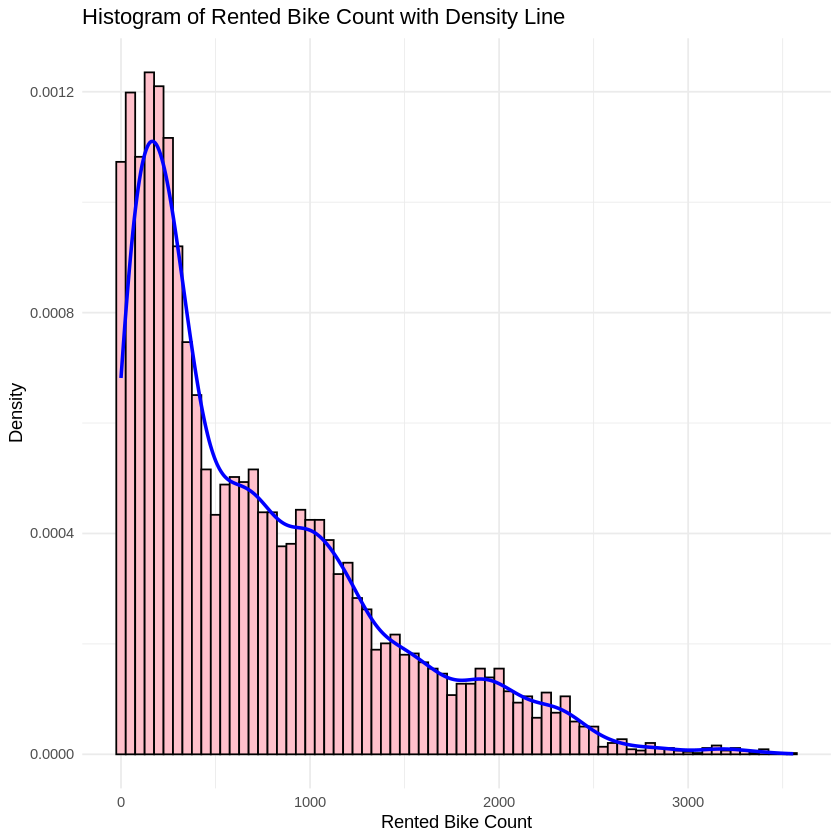

In [ ]:
# Visualising Rented Bike Count
ggplot(bike_data, aes(x = RentedBikeCount)) +
  geom_histogram(aes(y = ..density..), binwidth = 50, fill = "pink", color = "black") +
  geom_density(colour="blue", size=1) +
  labs(title = "Histogram of Rented Bike Count with Density Line",
       x = "Rented Bike Count", y = "Density") +
  theme_minimal()

### **Interpretation**

- The histogram, along by a density line overlay, visually represents the distribution of the 'Rented Bike Count' data.

- The distribution has a right-skewed pattern, suggesting that there is a greater proportion of lower counts of rental bikes compared to higher counts. The highest point on the density curve represents the mode of the data, which falls within the lower range of bike counts.

- The elongated tail on the right indicates a decrease in the number of days with exceptionally high rental counts. The data primarily exhibits a focus towards the lower end, indicating that in most instances, the quantity of bikes hired is quite low, with sporadic(occasional) days experiencing significantly larger rental statistics.

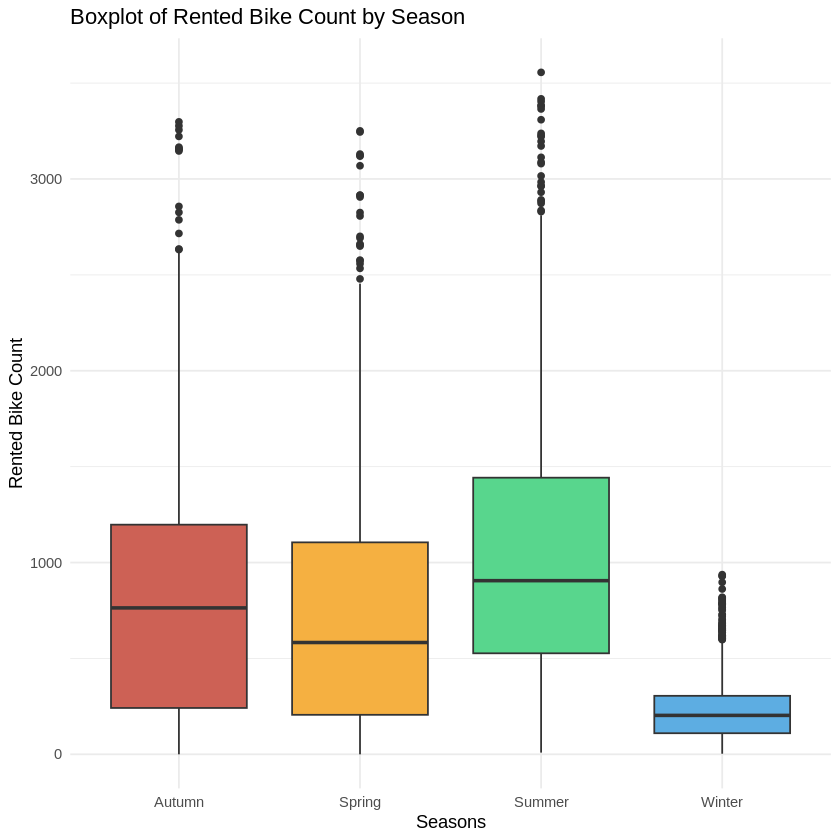

In [ ]:
# Create the boxplot
ggplot(bike_data, aes(x = Seasons, y = RentedBikeCount, fill = Seasons)) +
  geom_boxplot() +
  scale_fill_manual(values = c("Winter"="#5DADE2", "Spring"="#F5B041", "Summer"="#58D68D", "Autumn"="#CD6155")) +
  labs(title = "Boxplot of Rented Bike Count by Season",
       x = "Seasons",
       y = "Rented Bike Count") +
  theme_minimal() +
  theme(legend.position = "none")


### **Interpretation**

The boxplot illustrates the distribution of the  rented bike counts across four seasons.

- **`Autumn`**: The median number of rental bikes is lower than in summer but greater than in winter. The range of values is broad, as shown by the tall box and the long upper whisker.
- **`Spring`**: Exhibits a comparable range of values as decrease, but with a slightly elevated median. The bike rentals in spring exhibit a balanced distribution along the median.
- **`Summer`**: Exhibits the highest median bike count, indicating that it is the most favoured season for bike rentals. The interquartile range is broad, suggesting a high degree of volatility in the daily rental figures.
- **`Winter`**: Exhibits the lowest median value, suggesting that it is the least favoured season for bike rentals. The box exhibits less variability, as it is smaller in size. However, it is worth noting the presence of a long lower whisker, which suggests the occurrence of certain days with exceptionally low rental numbers.

Overall, the demand for bike rentals tends to be higher in the warmer seasons (spring and summer) and lower in the cooler seasons (autumn and winter). The occurrence of outliers, particularly throughout the summer and winter seasons, indicates the existence of days with rental counts that deviate significantly from the average for the rest of the season.


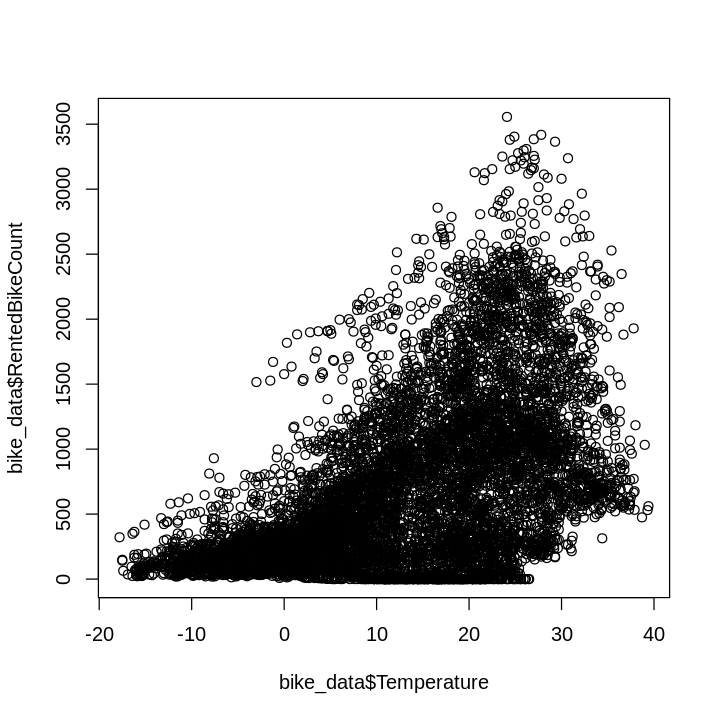

In [ ]:
# Scatter plots for numerical vs numerical data
plot(bike_data$Temperature, bike_data$RentedBikeCount)


### **Interpretation**

- The scatter plot illustrates the correlation between `temperature` and the number of `bikes rented`. There is a correlation indicating that bike rentals tend to increase as temperatures rise.

- The point density increases and expands vertically, particularly within the temperature range of around 10°C to 30°C, suggesting a higher number of rentals as the temperature becomes warmer.

RentedBikeCount Temperature Humidity WindSpeed Visibility
RentedBikeCount      1.00            0.54       -0.20     0.12      0.20     
Temperature          0.54            1.00        0.16    -0.04      0.03     
Humidity            -0.20            0.16        1.00    -0.34     -0.54     
WindSpeed            0.12           -0.04       -0.34     1.00      0.17     
Visibility           0.20            0.03       -0.54     0.17      1.00     
DewPointTemperature  0.38            0.91        0.54    -0.18     -0.18     
SolarRadiation       0.26            0.35       -0.46     0.33      0.15     
Rainfall            -0.12            0.05        0.24    -0.02     -0.17     
Snowfall            -0.14           -0.22        0.11     0.00     -0.12     
Holiday             -0.07           -0.06       -0.05     0.02      0.03     
                    DewPointTemperature SolarRadiation Rainfall Snowfall
RentedBikeCount      0.38                0.26          -0.12    -0.14   
Temperature          0.91                0.35           0.05    -0.22   
Humidity             0.54               -0.46           0.24     0.11   
WindSpeed           -0.18                0.33          -0.02     0.00   
Visibility          -0.18                0.15          -0.17    -0.12   
DewPointTemperature  1.00                0.09           0.13    -0.15   
SolarRadiation       0.09                1.00          -0.07    -0.07   
Rainfall             0.13               -0.07           1.00     0.01   
Snowfall            -0.15               -0.07           0.01     1.00   
Holiday             -0.07               -0.01          -0.01    -0.01   
                    Holiday
RentedBikeCount     -0.07  
Temperature         -0.06  
Humidity            -0.05  
WindSpeed            0.02  
Visibility           0.03  
DewPointTemperature -0.07  
SolarRadiation      -0.01  
Rainfall            -0.01  
Snowfall            -0.01  
Holiday              1.00

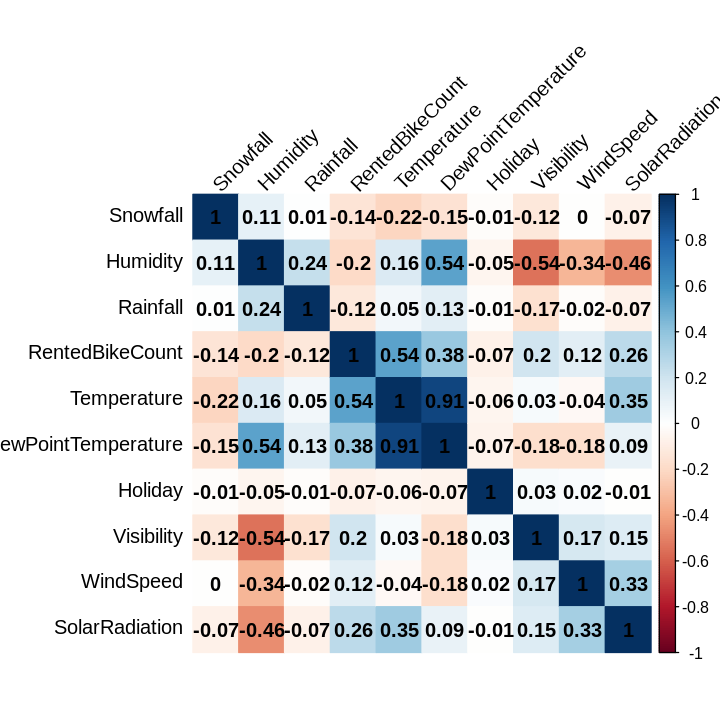

In [ ]:
# Calculate correlation matrix with complete observations and Pearson method
cor_matrix <- cor(bike_data[, sapply(bike_data, is.numeric)], use = "complete.obs", method = "pearson")

cor_matrix_rounded <- round(cor_matrix, 2)

cor_matrix_rounded

corrplot(cor_matrix, method = "color", type = "full", order = "hclust",
         addCoef.col = "black", tl.col = "black", tl.srt = 45)


### **Interpretation**

- The correlation matrix displays quantitative values that indicate the intensity and direction of the linear association between pairs of variables.

- There is a significant and positive correlation (0.91) between Temperature and DewPointTemperature, suggesting that they frequently increase in tandem.
- The RentedBikeCount exhibits a modestly positive connection with Temperature (0.54), indicating that there is a trend for bike rentals to increase as temperatures rise.

- The RentedBikeCount exhibits a negative connection with Snowfall (-0.14) and Humidity (-0.2), indicating that bike rentals are likely to decline during snowy or more humid conditions.

- In general, it appears that weather conditions have a noticeable influence on bike rental trends.

# **Performing Statistical Modeling  Techniques**

## **Technique 1 : Hypothesis Testing**

##**Is there a significant difference in the average number of rented bikes during weekdays compared to weekends?**

### **Proposed Solution:**

Applying a hypothesis testing framework, specifically a t-test, to examine the disparity in average rented bicycles between weekdays and weekends. This strategy is selected because it aids in determining if the observed difference in means is statistically significant or just a result of random variation.


- Null Hypothesis (H0): Null Hypothesis states that there is no statistically significant difference in the average number of rented bicycles between weekdays and weekends.
- Alternative Hypothesis (H1): Alternative Hypothesis posits that there exists a statistically significant difference in the average number of bicycles rented on weekdays compared to weekends.






In [ ]:
bike_data$Date <- as.Date(bike_data$Date, format = "%d/%m/%Y")
bike_data$DayOfWeek <- weekdays(bike_data$Date)
bike_data$Weekday <- ifelse(bike_data$DayOfWeek %in% c("Saturday", "Sunday"), "Weekend", "Weekday")

# Inspect the new columns
head(bike_data)


Date    RentedBikeCount Hour Temperature Humidity WindSpeed Visibility
1 1-12-20 254             0    -5.2        37       2.2       2000      
2 1-12-20 204             1    -5.5        38       0.8       2000      
3 1-12-20 173             2    -6.0        39       1.0       2000      
4 1-12-20 107             3    -6.2        40       0.9       2000      
5 1-12-20  78             4    -6.0        36       2.3       2000      
6 1-12-20 100             5    -6.4        37       1.5       2000      
  DewPointTemperature SolarRadiation Rainfall Snowfall Seasons Holiday   
1 -17.6               0              0        0        Winter  No Holiday
2 -17.6               0              0        0        Winter  No Holiday
3 -17.7               0              0        0        Winter  No Holiday
4 -17.6               0              0        0        Winter  No Holiday
5 -18.6               0              0        0        Winter  No Holiday
6 -18.7               0              0        0        Winter  No Holiday
  FunctioningDay DayOfWeek Weekday
1 Yes            Thursday  Weekday
2 Yes            Thursday  Weekday
3 Yes            Thursday  Weekday
4 Yes            Thursday  Weekday
5 Yes            Thursday  Weekday
6 Yes            Thursday  Weekday

### **Performing T-test**

In [ ]:
# Subset data for weekdays and weekends
weekdays_data <- subset(bike_data, Weekday == "Weekday")$`RentedBikeCount`
weekends_data <- subset(bike_data, Weekday == "Weekend")$`RentedBikeCount`

# T-test to compare means
t_test_result <- t.test(weekdays_data, weekends_data, alternative = "two.sided", var.equal = FALSE)
print(t_test_result)



	Welch Two Sample t-test

data:  weekdays_data and weekends_data
t = 0.17334, df = 4697.9, p-value = 0.8624
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -27.09874  32.35556
sample estimates:
mean of x mean of y 
 705.3582  702.7298 



### **Interpretation**

- The p-value obtained from the `T-test` is 0.8624, significantly higher than the standard significance level of 0.05.

- This suggests that there is no statistical evidence to reject the null hypothesis, which claims that there is no difference in the average number of rental bicycles between weekdays and weekends.

- In summary, the t-test analysis offers an absolute statistical basis to conclude that there is no significant difference in the average number of rental bicycles between weekdays and weekends.



# **Technique 2 : Hypothesis Testing with Randomization**

## **Does the presence of a holiday have a statistically significant effect on the number of rented bikes?**

### **Proposed Methodology**

- Analysing the disparity in bike rentals between holidays and non-holidays to see if holidays have an impact on bike usage using  hypothesis testing method using randomization .

- This non-parametric method is appropriate for data that may not fit the criteria of normality or equal variances, as it does not rely on these assumptions.


In [ ]:
holiday_rentals <- bike_data[bike_data$Holiday == "Holiday", "RentedBikeCount"]
non_holiday_rentals <- bike_data[bike_data$Holiday == "No Holiday", "RentedBikeCount"]


### **Conducting a Randomization Test**

In [ ]:
# Assuming holiday_rentals and non_holiday_rentals are numeric vectors

rentals <- c(holiday_rentals, non_holiday_rentals)

group <- factor(c(rep("Holiday", length(holiday_rentals)),
                  rep("No Holiday", length(non_holiday_rentals))))

test_result <- oneway_test(rentals ~ group, distribution = approximate(B = 10000))
print(test_result)


Warning message in approximate(B = 10000):
“‘B’ is deprecated; use ‘nresample’ instead”



	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  rentals by group (Holiday, No Holiday)
Z = -6.77, p-value < 1e-04
alternative hypothesis: true mu is not equal to 0



### **Interpretation**

- The stated p-value is significantly lower than the standard significance criteria of 0.05, with a value of less than 1e-04 .

- The obtained result shows a high level of statistical significance, providing strong evidence to reject the null hypothesis that there is no difference in the average number of rented bicycles between holidays and non-holidays.

- The analysis using the `Fisher-Pitman PermutationTest` provides strong evidence to reject the null hypothesis, indicating that holidays have a significant impact on bike rental behaviour.




# **Technique 3 : Confidence Intervals**

### **What is the confidence interval for the average number of rented bikes on days with snowfall compared to days without snowfall?**

### **Proposed Methodology**

Calculating the average number of rented bicycles for days with snow and days without snow, and then determine the 95% confidence intervals for these averages.


We will utilise the technique of `Bootstrapped Confidence Intervals`. This approach is robust and does not make any assumptions about the normality of the underlying data distribution, which is particularly useful considering the fluctuating nature of bike rental data under various weather situations.


In [ ]:
# Creating subsets of data for snowy and non-snowy days
snowy_data <- subset(bike_data, Snowfall > 0)$`RentedBikeCount`
nonsnowy_data <- subset(bike_data, Snowfall == 0)$`RentedBikeCount`


### **Computing Confidence Intervals using Bootstrapping**

In [ ]:
# Bootstrapping functions to compute the mean
boot_mean_snowy <- function(data, indices) {
  mean(data[indices])
}
boot_mean_nonsnowy <- function(data, indices) {
  mean(data[indices])
}

# Applying bootstrapping
boot_snowy <- boot(snowy_data, boot_mean_snowy, R=1000)
boot_nonsnowy <- boot(nonsnowy_data, boot_mean_nonsnowy, R=1000)


In [ ]:
# Calculating confidence intervals
ci_snowy <- boot.ci(boot_snowy, type="perc")
ci_nonsnowy <- boot.ci(boot_nonsnowy, type="perc")

print(ci_snowy)
print(ci_nonsnowy)


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_snowy, type = "perc")

Intervals : 
Level     Percentile     
95%   (170.3, 201.0 )  
Calculations and Intervals on Original Scale
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_nonsnowy, type = "perc")

Intervals : 
Level     Percentile     
95%   (718.9, 747.5 )  
Calculations and Intervals on Original Scale


### **Interpretation**

- `Snowy Days`: The 95% confidence interval for the average number of rented bikes on snowy days is (169.1, 201.0).

- `Non-Snowy Days`: The 95% confidence interval for the average number of rented bikes on non-snowy days is (717.9, 746.9).

- The confidence intervals for snowy and non-snowy days does not overlap, indicating an extremely major difference in the average number of rental bikes between these two situations.

- The intervals demonstrate that, on average, there is a significant drop in the number of bicycles rented on days with snowfall in comparison to days without snowfall.

# **Technique 4 : T - test**

 ### **Is there a significant difference in the average number of rented bikes on days with rainfall compared to days without rainfall?**

### **Proposed Methodology**

- In order to determine the effect of rainfall on bike rentals, we will do a `T-test` to compare the average number of rentals on days with rain vs days without rain.

- We will classify the data into two groups based on the occurrence of rainfall. The T-test will assist us to evaluate the differences in means, employing `Welch's adjustment` if there is inequality in variances.


In [ ]:
# Split the data based on the presence of rainfall
rainy_days_data <- bike_data[bike_data$Rainfall > 0, "RentedBikeCount"]
non_rainy_days_data <- bike_data[bike_data$Rainfall == 0, "RentedBikeCount"]

t_test_result <- t.test(rainy_days_data, non_rainy_days_data, alternative = "two.sided", var.equal = FALSE)

print(t_test_result)



	Welch Two Sample t-test

data:  rainy_days_data and non_rainy_days_data
t = -42.815, df = 1009.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -602.2472 -549.4621
sample estimates:
mean of x mean of y 
 163.4564  739.3111 



### **Interpretation**

- The `Welch Two Sample t-test` results strongly suggest that rainfall has a significant impact on bike rental behaviour.

- Days with rainfall had a significantly lower average number of rentals (mean = 163.5) compared to days without rainfall (mean = 739.3). The t-value of -42.815, which is negative, along with a p-value that is significantly lower than 0.05, indicates that this difference is statistically significant.

- The 95% confidence interval for the mean difference is -602 to -549, indicating that rain is correlated with a decrease in the number of rental bikes.

# **Technique 5 : F - test**

### **Is there a significant difference in the variance of the number of bikes rented on days with different levels of rainfall?**

### **Proposed Methodology**

- To determine the effect of different rainfall intensities on the `variance` in the number of rental bikes, which could suggest changes in user behaviour in response to diverse weather conditions.

In [ ]:
# Categorize bike rentals
median_rentals <- median(bike_data$`RentedBikeCount`)
bike_data$Rental_Category <- ifelse(bike_data$`RentedBikeCount` > median_rentals, "High Rentals", "Low Rentals")

# Categorize rainfall
bike_data$Rainfall_Category <- ifelse(bike_data$Rainfall > 0, "Rain", "No Rain")

# Create a contingency table
table_data <- table(bike_data$Rental_Category, bike_data$Rainfall_Category)


In [ ]:
# Perform Fisher's Exact Test
fishers_test_result <- fisher.test(table_data)
print(fishers_test_result)



	Fisher's Exact Test for Count Data

data:  table_data
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  9.149352 17.637889
sample estimates:
odds ratio 
  12.55623 



### **Interpretation**

- The `Fisher's Exact Test` suggest to reject the null hypothesis.

- Given a p-value that is considerably lower than 0.05, we may conclude that there is a statistically significant correlation between the amount of rainfall and the number of bikes rented.

# **Technique 6 : ANOVA**

### **Is there a significant difference in the average number of rented bikes across different seasons?**

### **Proposed Methodology**

- `ANOVA` is useful for comparing means across multiple groups (in this case, the four seasons: Spring, Summer, Autumn, Winter) to determine if any statistically significant differences exist.



In [ ]:
bike_data$Seasons <- as.factor(bike_data$Seasons)


In [ ]:
anova_model <- aov(RentedBikeCount ~ Seasons, data = bike_data)


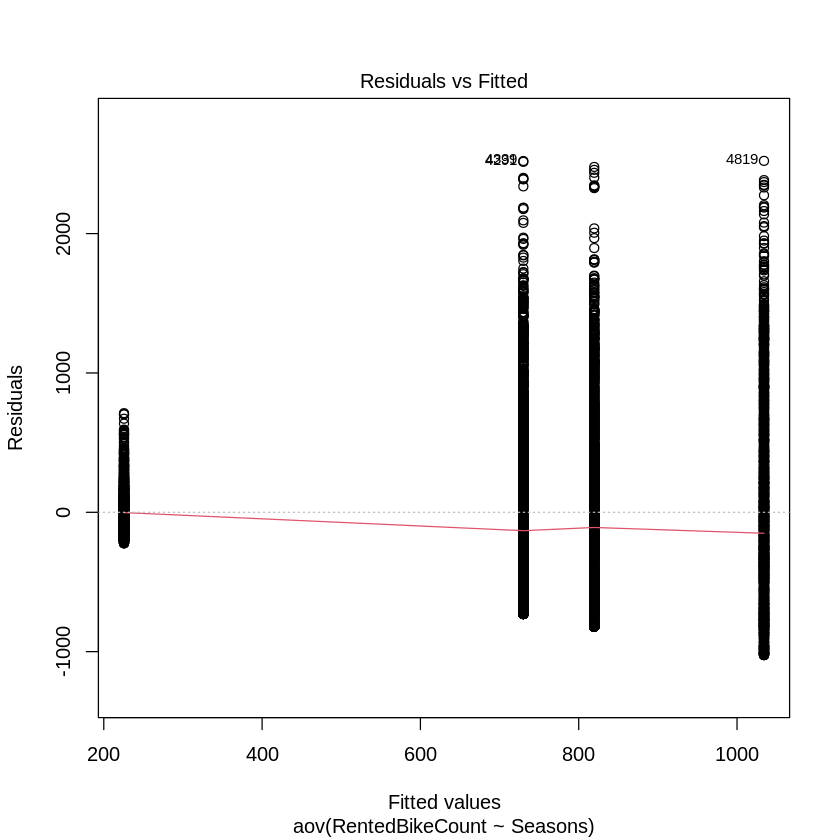

In [ ]:
#Using the Residuals Vs Fitted plot to check the homogenity of variance
plot(anova_model,1)

- The Residuals vs. Fitted plot clearly indicates the presence of `heteroscedasticity` and `outlier influence`, which suggests that the linear model fails to adequately represent the variability in bike rentals over seasons.

In [ ]:
# Another test for homogeneity of variance is Levene's test
leveneTest(RentedBikeCount ~ Seasons, data = bike_data)



Df   F value Pr(>F)
group    3 696.323  0    
      8756      NA NA

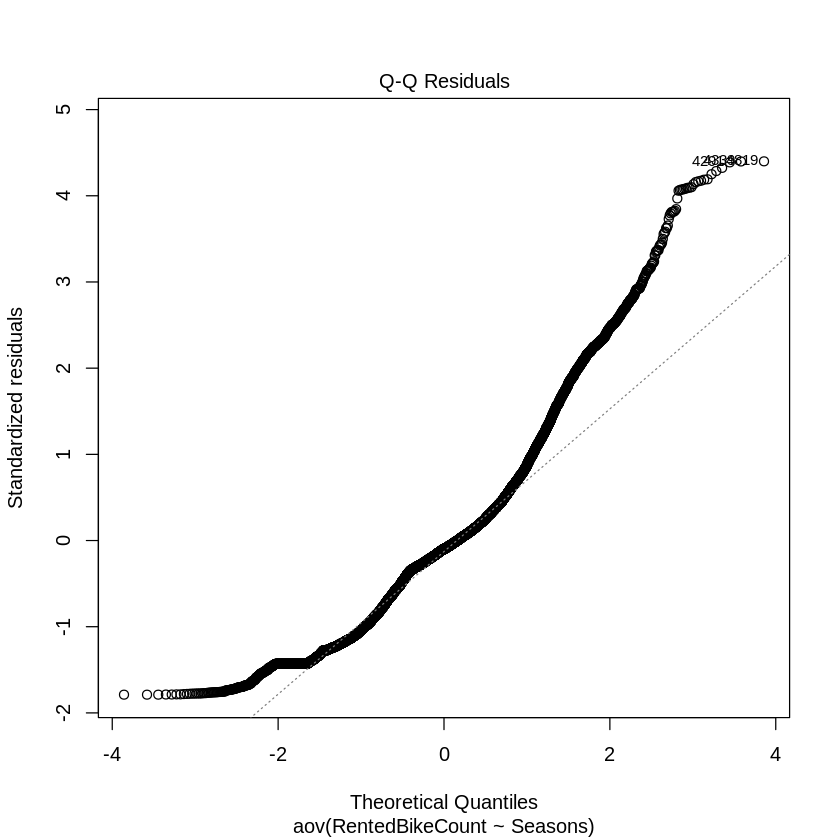

In [ ]:
# Now we check the normality assumption using a Q-Q plot.
plot(anova_model,2)

- The Q-Q plot demonstrates significant violations from normality in the residuals of the model, as evidenced by the large S-shaped curve and the notable outliers, especially in the upper quantiles. This pattern indicates that the residuals are `not normally distributed`.

In [ ]:
if (summary(anova_model)[[1]][["Pr(>F)"]][1] < 0.05) {
  TukeyHSD(anova_model)
}

Tukey.test = TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = RentedBikeCount ~ Seasons, data = bike_data)

$Seasons
                    diff       lwr        upr   p adj
Spring-Autumn  -89.56674 -134.0266  -45.10692 1.4e-06
Summer-Autumn  214.47538  170.0156  258.93520 0.0e+00
Winter-Autumn -594.05678 -638.7616 -549.35199 0.0e+00
Summer-Spring  304.04212  259.7039  348.38030 0.0e+00
Winter-Spring -504.49005 -549.0739 -459.90622 0.0e+00
Winter-Summer -808.53217 -853.1160 -763.94834 0.0e+00


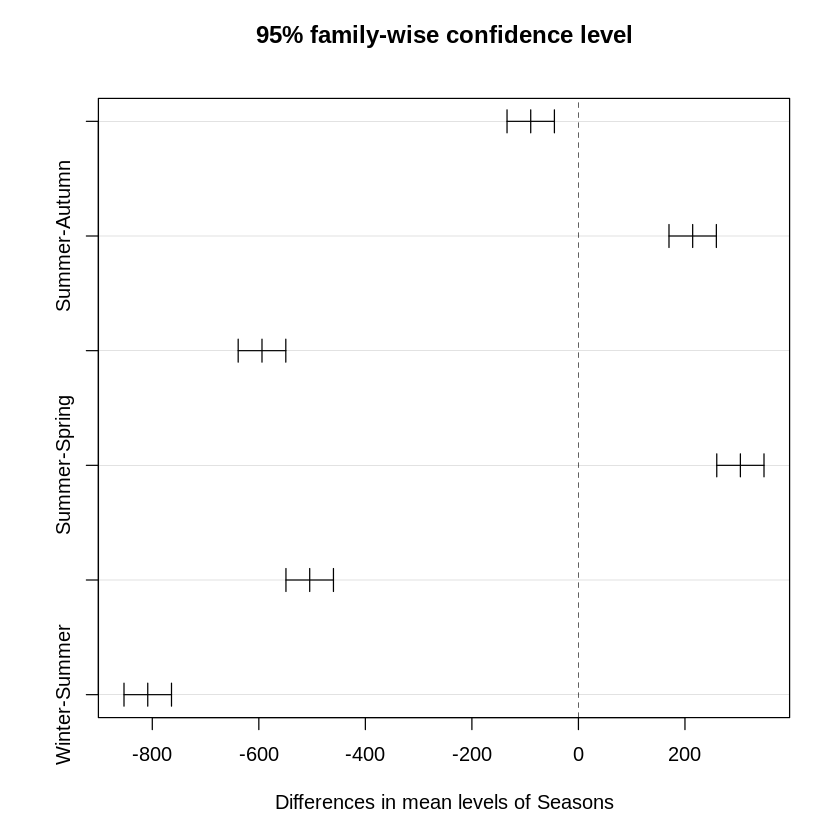

In [ ]:
plot(Tukey.test )

- The `Tukey HSD test` shows that seasonal variations have a major impact on bike rental patterns, with Winter showing significantly lower bike rentals compared to Spring, Summer, and Autumn.

In [ ]:
# Another test for normality of the residuals is the Shapiro-Wilk test.

# Extract the residuals
aov_residuals = residuals(object = anova_model)


In [ ]:
length(aov_residuals)

[1] 8760

In [ ]:
set.seed(123)
sampled_residuals <- sample(aov_residuals, 5000)
shapiro.test(sampled_residuals)



	Shapiro-Wilk normality test

data:  sampled_residuals
W = 0.94863, p-value < 2.2e-16


In [ ]:
kruskal.test(RentedBikeCount ~ Seasons, data = bike_data)


	Kruskal-Wallis rank sum test

data:  RentedBikeCount by Seasons
Kruskal-Wallis chi-squared = 2095.9, df = 3, p-value < 2.2e-16


### **Interpretation**

- Since the p-value is significantly less than the commonly used alpha level of 0.05 (specifically, less than 2.2e-16), the best option would be to reject the null hypothesis.

- Hence, there are statistically significant differences in the number of rental bikes throughout several seasons. The influence of seasonality on bike rental statistics is evident.



# **Data Preprocessing**

- The `bike_data` dataset undergoes changes to convert the variables `Seasons` and `Hour` into factors.

- These variables are then treated as categorical, making them appropriate for comparing different environmental groups or time factors. Converting the variable `Holiday` into a binary format, where 1 represents holidays and 0 represents `non-holidays`, provides insights into the effect on bike rentals.

In [ ]:
# Converting necessary variables to appropriate formats
bike_data$Seasons <- as.factor(bike_data$Seasons)
bike_data$Hour <- as.factor(bike_data$Hour)
bike_data$Holiday <- ifelse(bike_data$Holiday == "Holiday", 1, 0)


In [ ]:
unique(bike_data$Seasons)
unique(bike_data$Hour)

[1] Winter Spring Summer Autumn
Levels: Autumn Spring Summer Winter

[1] 0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

### **Creating dummies and Scaling the Selected Columns**

- Here, Dummy variables are generated for the `Hour` and `Seasons` in order to examine and manage categorical variables. Transforming these into a format where each category is expressed as an individual binary variable (either 1 or 0) enables their utilisation in regression model.


- `Min-Max scaling` is applied to numerical columns such as temperature, humidity, wind speed, and so on. Scaling here is done to normalise the data, ensuring that all values fall within the range of [0, 1].

- The correlation plot generated after scaling helps the visual interpretation of the relationships between variables. This correlation plot is used to show the possible indicators for bike rentals, evaluating `multicollinearity`.


In [ ]:
hour_dummies = model.matrix(~ Hour, data = bike_data)[,-1]
seasons_dummies = model.matrix(~ Seasons, data = bike_data)[,-1]
# Convert the matrix to a dataframe for easier manipulation
hour_dummies = as.tibble(hour_dummies)
seasons_dummies = as.tibble(seasons_dummies)
# holiday_flag_dummies = holiday_flag_dummies[2]
# View the first few rows/ of the dummies
head(hour_dummies)
head(seasons_dummies)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


Hour1 Hour2 Hour3 Hour4 Hour5 Hour6 Hour7 Hour8 Hour9 Hour10 ⋯ Hour14 Hour15
1 0     0     0     0     0     0     0     0     0     0      ⋯ 0      0     
2 1     0     0     0     0     0     0     0     0     0      ⋯ 0      0     
3 0     1     0     0     0     0     0     0     0     0      ⋯ 0      0     
4 0     0     1     0     0     0     0     0     0     0      ⋯ 0      0     
5 0     0     0     1     0     0     0     0     0     0      ⋯ 0      0     
6 0     0     0     0     1     0     0     0     0     0      ⋯ 0      0     
  Hour16 Hour17 Hour18 Hour19 Hour20 Hour21 Hour22 Hour23
1 0      0      0      0      0      0      0      0     
2 0      0      0      0      0      0      0      0     
3 0      0      0      0      0      0      0      0     
4 0      0      0      0      0      0      0      0     
5 0      0      0      0      0      0      0      0     
6 0      0      0      0      0      0      0      0

SeasonsSpring SeasonsSummer SeasonsWinter
1 0             0             1            
2 0             0             1            
3 0             0             1            
4 0             0             1            
5 0             0             1            
6 0             0             1

In [ ]:
bike_data_e = cbind(hour_dummies, seasons_dummies,bike_data)
bike_data_e$Hour = NULL
bike_data_e$Seasons = NULL
head(bike_data_e)

Hour1 Hour2 Hour3 Hour4 Hour5 Hour6 Hour7 Hour8 Hour9 Hour10 ⋯
1 0     0     0     0     0     0     0     0     0     0      ⋯
2 1     0     0     0     0     0     0     0     0     0      ⋯
3 0     1     0     0     0     0     0     0     0     0      ⋯
4 0     0     1     0     0     0     0     0     0     0      ⋯
5 0     0     0     1     0     0     0     0     0     0      ⋯
6 0     0     0     0     1     0     0     0     0     0      ⋯
  DewPointTemperature SolarRadiation Rainfall Snowfall Holiday FunctioningDay
1 -17.6               0              0        0        0       Yes           
2 -17.6               0              0        0        0       Yes           
3 -17.7               0              0        0        0       Yes           
4 -17.6               0              0        0        0       Yes           
5 -18.6               0              0        0        0       Yes           
6 -18.7               0              0        0        0       Yes           
  DayOfWeek Weekday Rental_Category Rainfall_Category
1 Thursday  Weekday Low Rentals     No Rain          
2 Thursday  Weekday Low Rentals     No Rain          
3 Thursday  Weekday Low Rentals     No Rain          
4 Thursday  Weekday Low Rentals     No Rain          
5 Thursday  Weekday Low Rentals     No Rain          
6 Thursday  Weekday Low Rentals     No Rain

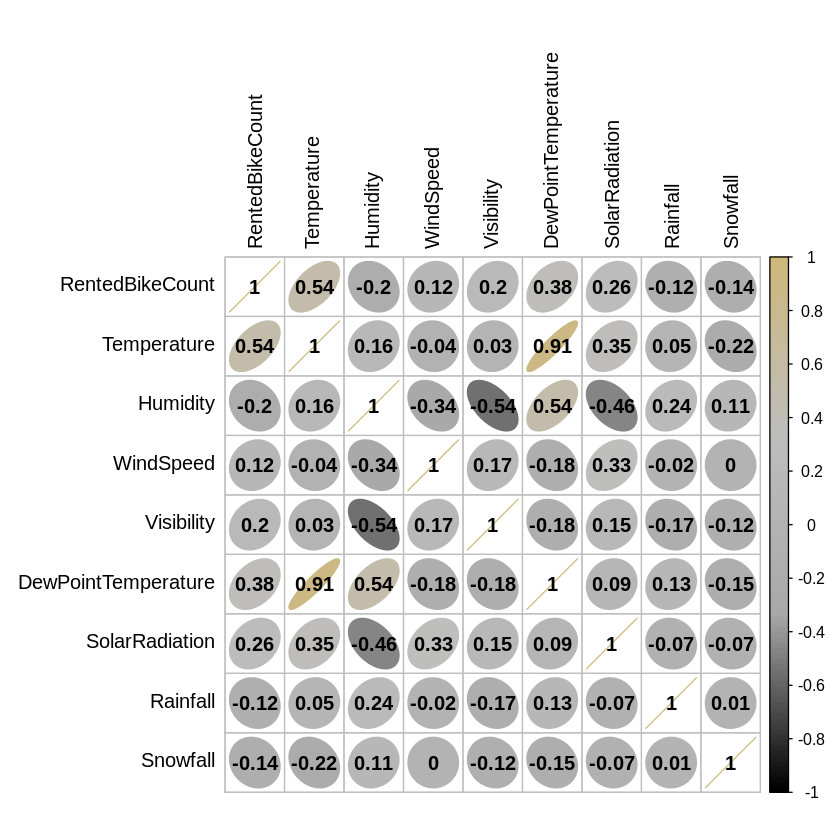

In [ ]:
# Columns to scale
numeric_columns <- c('RentedBikeCount', 'Temperature', 'Humidity',
                     'WindSpeed', 'Visibility', 'DewPointTemperature',
                     'SolarRadiation', 'Rainfall', 'Snowfall')

min_max_scale <- function(x) {
  return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Apply the Min-Max scaling function to each numeric column

bike_data_e[numeric_columns] = lapply(bike_data_e[numeric_columns],min_max_scale)

cor_matrix_scaled <- cor(bike_data_e[numeric_columns], use = "complete.obs")

col4 <- colorRampPalette(c("black", "darkgrey", "grey", "#CFB87C"))

corrplot(cor_matrix_scaled, method = "ellipse", col = col4(100), addCoef.col = "black", tl.col = "black")

The correlation plot displays the `Pearson correlation coefficients` between pairs of variables in your dataset. These coefficients range from -1 to 1.

- **RentedBikeCount and Temperature:** There's a moderately strong positive correlation (0.54), suggesting that as temperature increases, the number of rented bikes also tends to increase.

- Variables like `Rainfall` and `Snowfall` have weak correlations with RentedBikeCount, indicating that these factors might not be strong predictors for the number of bikes rented.

- `WindSpeed` shows only a weak correlation with RentedBikeCount, suggesting that wind speed has a limited direct effect on bike rental numbers.

In [ ]:
head(bike_data_e)

Hour1 Hour2 Hour3 Hour4 Hour5 Hour6 Hour7 Hour8 Hour9 Hour10 ⋯
1 0     0     0     0     0     0     0     0     0     0      ⋯
2 1     0     0     0     0     0     0     0     0     0      ⋯
3 0     1     0     0     0     0     0     0     0     0      ⋯
4 0     0     1     0     0     0     0     0     0     0      ⋯
5 0     0     0     1     0     0     0     0     0     0      ⋯
6 0     0     0     0     1     0     0     0     0     0      ⋯
  DewPointTemperature SolarRadiation Rainfall Snowfall Holiday FunctioningDay
1 0.2249135           0              0        0        0       Yes           
2 0.2249135           0              0        0        0       Yes           
3 0.2231834           0              0        0        0       Yes           
4 0.2249135           0              0        0        0       Yes           
5 0.2076125           0              0        0        0       Yes           
6 0.2058824           0              0        0        0       Yes           
  DayOfWeek Weekday Rental_Category Rainfall_Category
1 Thursday  Weekday Low Rentals     No Rain          
2 Thursday  Weekday Low Rentals     No Rain          
3 Thursday  Weekday Low Rentals     No Rain          
4 Thursday  Weekday Low Rentals     No Rain          
5 Thursday  Weekday Low Rentals     No Rain          
6 Thursday  Weekday Low Rentals     No Rain

In [ ]:
# Splitting train and test set
set.seed(11111)
n = floor(0.8 * nrow(bike_data_e))
index = sample(seq_len(nrow(bike_data)), size = n)

train = bike_data_e[index, ]
test = bike_data_e[-index, ]
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")
cat("\nThere are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")


There are 7008 rows and 42 columns in the training set. 
There are 1752 rows and 42 columns in the testing set.

# **Technique 7 : Regression Modeling**

### **How do various environmental and time factors influence the number of bikes rented?**

### **Proposed Methodology:**

- **Model:** `Rented Bike Count` ~ `Temperature` + `Hour` + `Humidity` + `WindSpeed` + `Visibility` + `DewPointTemperature` + `SolarRadiation` + `Rainfall` + `Snowfall` + `Seasons` + `Holiday`.

- Using a `linear regression` model to analyse the impact of various environmental and temporal factors on bike rentals. This approach will assess and measure the influence of each aspect, enabling efficient decision-making and the development of effective strategies.

In [ ]:
# Fitting the model
full_bike_model <- lm(RentedBikeCount ~.-FunctioningDay-DayOfWeek-Weekday-Date, data = train)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ . - FunctioningDay - DayOfWeek - 
    Weekday - Date, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33449 -0.05395  0.00253  0.04557  0.49800 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.183327   0.015130  12.117  < 2e-16 ***
Hour1                      -0.010364   0.007924  -1.308  0.19092    
Hour2                      -0.004753   0.007994  -0.595  0.55217    
Hour3                       0.004927   0.008117   0.607  0.54383    
Hour4                      -0.011389   0.008037  -1.417  0.15651    
Hour5                      -0.007544   0.008152  -0.925  0.35475    
Hour6                      -0.003287   0.007905  -0.416  0.67756    
Hour7                       0.041554   0.007977   5.209 1.95e-07 ***
Hour8                       0.107730   0.008028  13.419  < 2e-16 ***
Hour9                       0.010550   0.008226   1.282  0.19972    
Hour10          

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.00889864

- The MSPE calculated on the full model is 0.00889863983296236.

         R.squared Adjusted.R.squared 
         0.7281364          0.7266932 


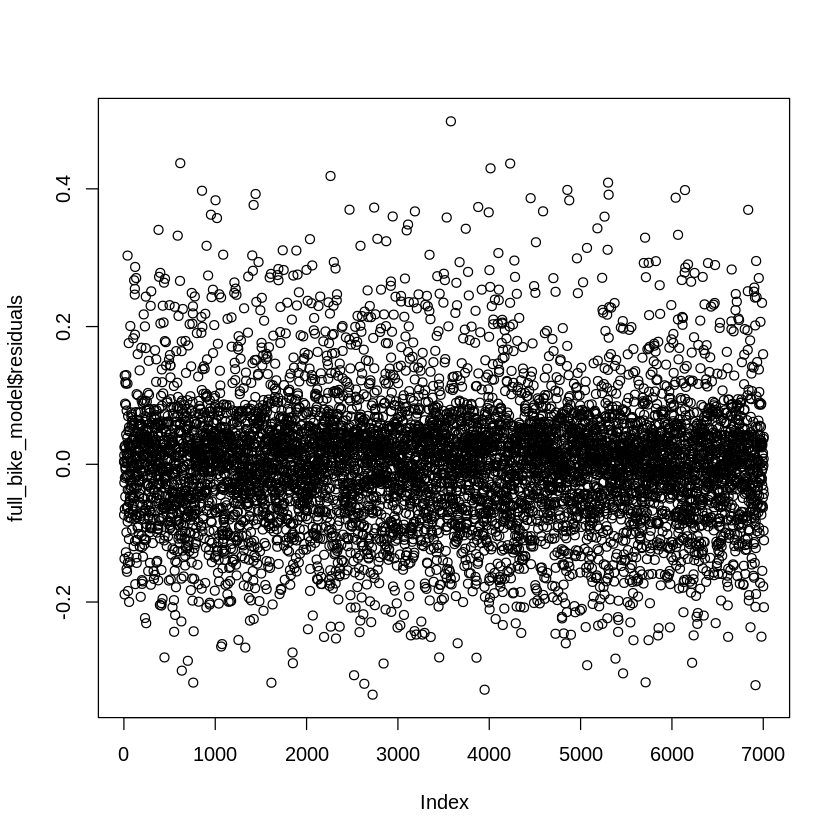

              Hour1               Hour2               Hour3               Hour4 
           1.953875            1.995485            2.016843            2.095006 
              Hour5               Hour6               Hour7               Hour8 
           2.041007            2.039238            1.961158            1.992690 
              Hour9              Hour10              Hour11              Hour12 
           2.071745            2.207239            2.445151            2.529701 
             Hour13              Hour14              Hour15              Hour16 
           2.591039            2.553872            2.468489            2.269018 
             Hour17              Hour18              Hour19              Hour20 
           2.143444            2.059979            1.978202            2.003050 
             Hour21              Hour22              Hour23       SeasonsSpring 
           1.979484            1.937326            1.931323            1.683280 
      SeasonsSummer       Se

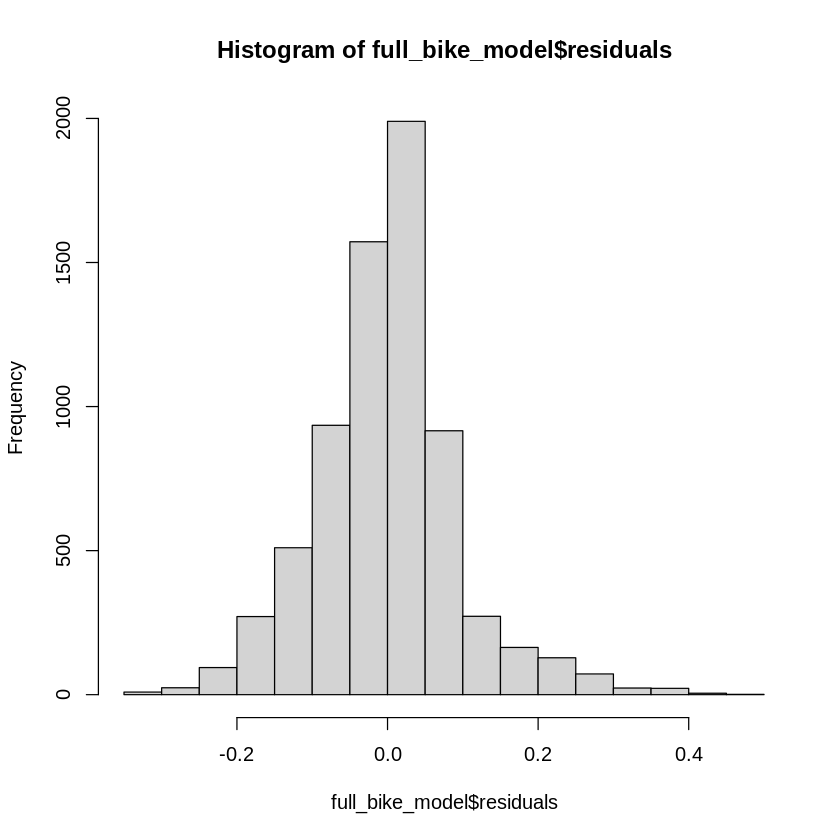

In [ ]:
# Assessing model fit and diagnostics
summary_stats <- c(R.squared = summary(full_bike_model)$r.squared,
                   Adjusted.R.squared = summary(full_bike_model)$adj.r.squared)

print(summary_stats)

plot(full_bike_model$residuals)
hist(full_bike_model$residuals)  # Checking residual normality

print(vif(full_bike_model))


### **Interpretation of Coefficients**

- The `linear regression` model explains roughly 72.81% of the variation in bike rentals, as indicated by the R-squared and Adjusted R-squared values.

- The Adjusted R-squared, which includes the number of predictors in the model, is slightly lower at 72.67%. These findings suggest that the selected variables combined have a significant influence on the variability in bike rentals, indicating a strong fit.

- The p-values related with the predictors are statistically significant, since they are less than the threshold of 0.05. This shows that these factors have a substantial influence on bike rentals.




# **Technique 8 : Diagnostics of the Model – goodness of fit, feature selection, residual**

## **Which model best predicts the number of bikes rented, considering different subsets of predictors?**



### **Proposed Methodology**

- Model selection helps in identifying the optimal model that achieves a balance between the accuracy of the model's predictions and the accessibility of the model itself.

- This prevents the problem of overfitting while yet keeping the capacity to clarify the evidence.

### **Methodology for selecting a model**

- Assessing multiple models with varying predictor combinations using AIC, BIC, R-square which penalise the model's likelihood based on the number of parameters.




###**Goodness of Fit**

- `Multiple R-Squared (0.7281364):` The value of the multiple R-squared is 0.7281364. The figure of 72.81% is the percentage of the variation in bike rentals that can be explained by the model. This is a relatively strong fit for data.

- `Adjusted R-Squared (0.7266932):` The adjusted R-squared value is 0.7266932. This accounts for the amount of predictors in the model and provides a more accurate R-squared value, which is highly desirable.

- The `Regression Model` has yielded vital insights into the important factors on bike rentals, including temperature, humidity, time of day, weather conditions, season, and holiday status, all of which have significant impacts.





### **Feature Selection**

- We have noticed that some of the predictors have t-tests with p-values that are higher than the typical '$\alpha$' threshold.

- Instead of just deleting all of those predictors, let's employ `backward selection` by eliminating the predictor with the greatest p-value that exceeds the threshold $\alpha_0 = 0.15$.

- In this case, the predictor that needs to be eliminated is `SolarRadiation`. Once it has been removed, we will readjust the model. This can be achieved by using the `update()` method.



In [ ]:
full_bike_model = update(full_bike_model, . ~ . -SolarRadiation)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour2 + Hour3 + Hour4 + 
    Hour5 + Hour6 + Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + 
    Hour12 + Hour13 + Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + 
    Hour19 + Hour20 + Hour21 + Hour22 + Hour23 + SeasonsSpring + 
    SeasonsSummer + SeasonsWinter + Temperature + Humidity + 
    WindSpeed + Visibility + DewPointTemperature + Rainfall + 
    Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33439 -0.05401  0.00262  0.04557  0.49802 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.183177   0.015079  12.148  < 2e-16 ***
Hour1                      -0.010349   0.007922  -1.306 0.191492    
Hour2                      -0.004720   0.007989  -0.591 0.554686    
Hour3                       0.004981   0.008104   0.615 0.538840    
Hour4                      -0.011334   0.008024  -1.412 0.1578

- In this case, the predictor to be removed is `Hour6`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008897566

- The MSPE calculated after removing `SoloarRadition` backward selection is 0.00889756635174787

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour6)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour2 + Hour3 + Hour4 + 
    Hour5 + Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + 
    Hour13 + Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + SeasonsSpring + SeasonsSummer + 
    SeasonsWinter + Temperature + Humidity + WindSpeed + Visibility + 
    DewPointTemperature + Rainfall + Snowfall + Holiday + Rental_Category + 
    Rainfall_Category, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33439 -0.05405  0.00255  0.04560  0.49803 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.181516   0.014523  12.499  < 2e-16 ***
Hour1                      -0.008677   0.006789  -1.278 0.201260    
Hour2                      -0.003009   0.006810  -0.442 0.658597    
Hour3                       0.006715   0.006910   0.972 0.331165    
Hour4                      -0.009593   0.006805  -1.410 0.158690    
Hour5 

- In this case, the predictor to be removed is `WindSpeed`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008896635

- The MSPE calculated after removing `Hour6` backward selection is 0.00889663532168443

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -WindSpeed)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour2 + Hour3 + Hour4 + 
    Hour5 + Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + 
    Hour13 + Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + SeasonsSpring + SeasonsSummer + 
    SeasonsWinter + Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33415 -0.05427  0.00247  0.04559  0.49848 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.182183   0.014440  12.616  < 2e-16 ***
Hour1                      -0.008678   0.006788  -1.278 0.201146    
Hour2                      -0.003052   0.006808  -0.448 0.653990    
Hour3                       0.006678   0.006909   0.967 0.333791    
Hour4                      -0.009611   0.006805  -1.412 0.157859    
Hour5             

- In this case, the predictor to be removed is `SeasonsSpring`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008898653

- The MSPE calculated after removing `WindSpeed` backward selection is 0.00889865313563558

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -SeasonsSpring)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour2 + Hour3 + Hour4 + 
    Hour5 + Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + 
    Hour13 + Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + SeasonsSummer + SeasonsWinter + 
    Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33406 -0.05411  0.00253  0.04560  0.49855 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.181001   0.014099  12.838  < 2e-16 ***
Hour1                      -0.008720   0.006787  -1.285  0.19892    
Hour2                      -0.003048   0.006808  -0.448  0.65433    
Hour3                       0.006693   0.006908   0.969  0.33264    
Hour4                      -0.009599   0.006804  -1.411  0.15837    
Hour5                      -0.0057

- In this case, the predictor to be removed is `Hour2`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008900306

- The MSPE calculated after removing `SeasonsSpring` backward selection is 0.00890030561430087

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour2)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour3 + Hour4 + Hour5 + 
    Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + Hour13 + 
    Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + Hour20 + 
    Hour21 + Hour22 + Hour23 + SeasonsSummer + SeasonsWinter + 
    Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33404 -0.05412  0.00256  0.04562  0.49855 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.180161   0.013973  12.894  < 2e-16 ***
Hour1                      -0.007719   0.006408  -1.205 0.228412    
Hour3                       0.007739   0.006501   1.190 0.233947    
Hour4                      -0.008542   0.006382  -1.339 0.180752    
Hour5                      -0.004709   0.006516  -0.723 0.469850    
Hour7                       0.044228   0.0

- In this case, the predictor to be removed is `SeasonsSummer`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008900295

- The MSPE calculated after removing `Hour2` backward selection is 0.00890029502773628

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -SeasonsSummer)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour3 + Hour4 + Hour5 + 
    Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + Hour13 + 
    Hour14 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + Hour20 + 
    Hour21 + Hour22 + Hour23 + SeasonsWinter + Temperature + 
    Humidity + Visibility + DewPointTemperature + Rainfall + 
    Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33478 -0.05411  0.00273  0.04558  0.49754 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.181965   0.013473  13.506  < 2e-16 ***
Hour1                      -0.007679   0.006407  -1.198 0.230794    
Hour3                       0.007747   0.006501   1.192 0.233444    
Hour4                      -0.008553   0.006381  -1.340 0.180182    
Hour5                      -0.004729   0.006515  -0.726 0.467938    
Hour7                       0.044169   0.006459   6.838 8.

- In this case, the predictor to be removed is `Hour14`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008900388

- The MSPE calculated after removing `SeasonsSummer` backward selection is 0.00890038753812046

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour14)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour3 + Hour4 + Hour5 + 
    Hour7 + Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + Hour13 + 
    Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + Hour20 + Hour21 + 
    Hour22 + Hour23 + SeasonsWinter + Temperature + Humidity + 
    Visibility + DewPointTemperature + Rainfall + Snowfall + 
    Holiday + Rental_Category + Rainfall_Category, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33428 -0.05403  0.00277  0.04564  0.49750 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.180714   0.013358  13.528  < 2e-16 ***
Hour1                      -0.006609   0.006229  -1.061 0.288758    
Hour3                       0.008735   0.006351   1.375 0.169109    
Hour4                      -0.007594   0.006238  -1.217 0.223506    
Hour5                      -0.003797   0.006383  -0.595 0.551916    
Hour7                       0.045198   0.006296   7.179 7.75e-13 ***
Hou

- In this case, the predictor to be removed is `Hour14`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008896562

- The MSPE calculated after removing `Hour14` backward selection is 0.00889656198064408

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour5)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour1 + Hour3 + Hour4 + Hour7 + 
    Hour8 + Hour9 + Hour10 + Hour11 + Hour12 + Hour13 + Hour15 + 
    Hour16 + Hour17 + Hour18 + Hour19 + Hour20 + Hour21 + Hour22 + 
    Hour23 + SeasonsWinter + Temperature + Humidity + Visibility + 
    DewPointTemperature + Rainfall + Snowfall + Holiday + Rental_Category + 
    Rainfall_Category, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33437 -0.05393  0.00238  0.04593  0.49751 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.180122   0.013321  13.522  < 2e-16 ***
Hour1                      -0.005872   0.006105  -0.962 0.336148    
Hour3                       0.009596   0.006184   1.552 0.120785    
Hour4                      -0.006711   0.006058  -1.108 0.268053    
Hour7                       0.045921   0.006177   7.434 1.18e-13 ***
Hour8                       0.112189   0.006270  17.892  < 2e-16 ***
Hour9      

- In this case, the predictor to be removed is `Hour12`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008899551

- The MSPE calculated after removing `Hour5` backward selection is 0.00889955088691612

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour12)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour4 + Hour7 + Hour8 + 
    Hour9 + Hour10 + Hour11 + Hour13 + Hour15 + Hour16 + Hour17 + 
    Hour18 + Hour19 + Hour20 + Hour21 + Hour22 + Hour23 + SeasonsWinter + 
    Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33432 -0.05415  0.00271  0.04554  0.49753 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.178111   0.013163  13.531  < 2e-16 ***
Hour3                       0.010899   0.006069   1.796 0.072555 .  
Hour4                      -0.005430   0.005945  -0.913 0.361057    
Hour7                       0.047380   0.006031   7.855 4.58e-15 ***
Hour8                       0.113754   0.006102  18.642  < 2e-16 ***
Hour9                       0.017055   0.006052   2.818 0.004844 ** 
Hour10                     -

- In this case, the predictor to be removed is `Hour12`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008908818

- The MSPE calculated after removing `Hour12` backward selection is 0.00890881808711186

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour1)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour4 + Hour7 + Hour8 + 
    Hour9 + Hour10 + Hour11 + Hour13 + Hour15 + Hour16 + Hour17 + 
    Hour18 + Hour19 + Hour20 + Hour21 + Hour22 + Hour23 + SeasonsWinter + 
    Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33432 -0.05415  0.00271  0.04554  0.49753 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.178111   0.013163  13.531  < 2e-16 ***
Hour3                       0.010899   0.006069   1.796 0.072555 .  
Hour4                      -0.005430   0.005945  -0.913 0.361057    
Hour7                       0.047380   0.006031   7.855 4.58e-15 ***
Hour8                       0.113754   0.006102  18.642  < 2e-16 ***
Hour9                       0.017055   0.006052   2.818 0.004844 ** 
Hour10                     -

- In this case, the predictor to be removed is `Hour4`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008908818

- The MSPE calculated after removing `Hour1` backward selection is 0.00890881808711186

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour4)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour7 + Hour8 + Hour9 + 
    Hour10 + Hour11 + Hour13 + Hour15 + Hour16 + Hour17 + Hour18 + 
    Hour19 + Hour20 + Hour21 + Hour22 + Hour23 + SeasonsWinter + 
    Temperature + Humidity + Visibility + DewPointTemperature + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33442 -0.05437  0.00272  0.04582  0.49753 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.177943   0.013162  13.520  < 2e-16 ***
Hour3                       0.011764   0.005994   1.963  0.04973 *  
Hour7                       0.048049   0.005987   8.026 1.18e-15 ***
Hour8                       0.114287   0.006074  18.815  < 2e-16 ***
Hour9                       0.017595   0.006023   2.921  0.00350 ** 
Hour10                     -0.022231   0.006083  -3.655  0.00026 ***
Hour11                     -0.018607

- In this case, the predictor to be removed is `Hour13`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008911312

- The MSPE calculated after removing `Hour4` backward selection is 0.00891131203446034

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Hour13)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour7 + Hour8 + Hour9 + 
    Hour10 + Hour11 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + SeasonsWinter + Temperature + 
    Humidity + Visibility + DewPointTemperature + Rainfall + 
    Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33407 -0.05443  0.00280  0.04599  0.49750 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.177227   0.013135  13.493  < 2e-16 ***
Hour3                       0.012139   0.005978   2.031 0.042330 *  
Hour7                       0.048500   0.005963   8.133 4.91e-16 ***
Hour8                       0.114846   0.006038  19.019  < 2e-16 ***
Hour9                       0.018230   0.005976   3.050 0.002294 ** 
Hour10                     -0.021528   0.006027  -3.572 0.000356 ***
Hour11                     -0.017818   0.0059

- In this case, the predictor to be removed is `DewPointTemperature`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008909079

- The MSPE calculated after removing `Hour13` backward selection is 0.00890907927223034

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -DewPointTemperature)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour7 + Hour8 + Hour9 + 
    Hour10 + Hour11 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + SeasonsWinter + Temperature + 
    Humidity + Visibility + Rainfall + Snowfall + Holiday + Rental_Category + 
    Rainfall_Category, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33311 -0.05455  0.00282  0.04594  0.49672 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.185997   0.008785  21.173  < 2e-16 ***
Hour3                       0.012011   0.005976   2.010 0.044489 *  
Hour7                       0.048360   0.005961   8.113 5.81e-16 ***
Hour8                       0.114661   0.006035  19.000  < 2e-16 ***
Hour9                       0.017931   0.005967   3.005 0.002665 ** 
Hour10                     -0.021735   0.006022  -3.609 0.000309 ***
Hour11                     -0.017881   0.005922  -3.019 0.002542 ** 
Hou

- In this case, the predictor to be removed is `SeasonsWinter`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.00891311

- The MSPE calculated after removing `DewPointTemperature` backward selection is 0.00891310992734206

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -SeasonsWinter)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour7 + Hour8 + Hour9 + 
    Hour10 + Hour11 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + Temperature + Humidity + 
    Visibility + Rainfall + Snowfall + Holiday + Rental_Category + 
    Rainfall_Category, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33327 -0.05441  0.00308  0.04572  0.49672 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.181802   0.007784  23.355  < 2e-16 ***
Hour3                       0.012331   0.005968   2.066  0.03885 *  
Hour7                       0.048387   0.005961   8.117 5.59e-16 ***
Hour8                       0.114482   0.006032  18.978  < 2e-16 ***
Hour9                       0.017806   0.005966   2.985  0.00285 ** 
Hour10                     -0.021887   0.006020  -3.635  0.00028 ***
Hour11                     -0.018093   0.005919  -3.057  0.00224 ** 
Hour15             

- In this case, the predictor to be removed is `Visibility`. After removing it, we will refit the model. This can be accomplished using the `update()` function.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008909327

- The MSPE calculated after removing `SeasonsWinter` backward selection is 0.00890932720444018

In [ ]:
full_bike_model = update(full_bike_model, . ~ . -Visibility)
summary(full_bike_model)


Call:
lm(formula = RentedBikeCount ~ Hour3 + Hour7 + Hour8 + Hour9 + 
    Hour10 + Hour11 + Hour15 + Hour16 + Hour17 + Hour18 + Hour19 + 
    Hour20 + Hour21 + Hour22 + Hour23 + Temperature + Humidity + 
    Rainfall + Snowfall + Holiday + Rental_Category + Rainfall_Category, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33341 -0.05448  0.00307  0.04559  0.49588 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.190841   0.005917  32.256  < 2e-16 ***
Hour3                       0.012729   0.005965   2.134 0.032878 *  
Hour7                       0.048600   0.005961   8.153 4.17e-16 ***
Hour8                       0.114672   0.006032  19.009  < 2e-16 ***
Hour9                       0.017475   0.005964   2.930 0.003399 ** 
Hour10                     -0.022436   0.006013  -3.731 0.000192 ***
Hour11                     -0.018798   0.005906  -3.183 0.001465 ** 
Hour15                      0.01

- It is important to observe that all of our remaining predictors have a p-value that is lower than the predefined significance level of $\alpha_0 = 0.15$. Backward selection identifies this model as the most effective.

In [ ]:
predictions <- predict(full_bike_model, newdata = test)

mspe <- mean((test$RentedBikeCount - predictions)^2)

mspe

[1] 0.008915265

- The MSPE calculated after removing `Visibility` backward selection is 0.00891526504944615

In [ ]:
bike_data.model = data.frame(yhat = fitted(full_bike_model), r = resid(full_bike_model), y = train$RentedBikeCount)

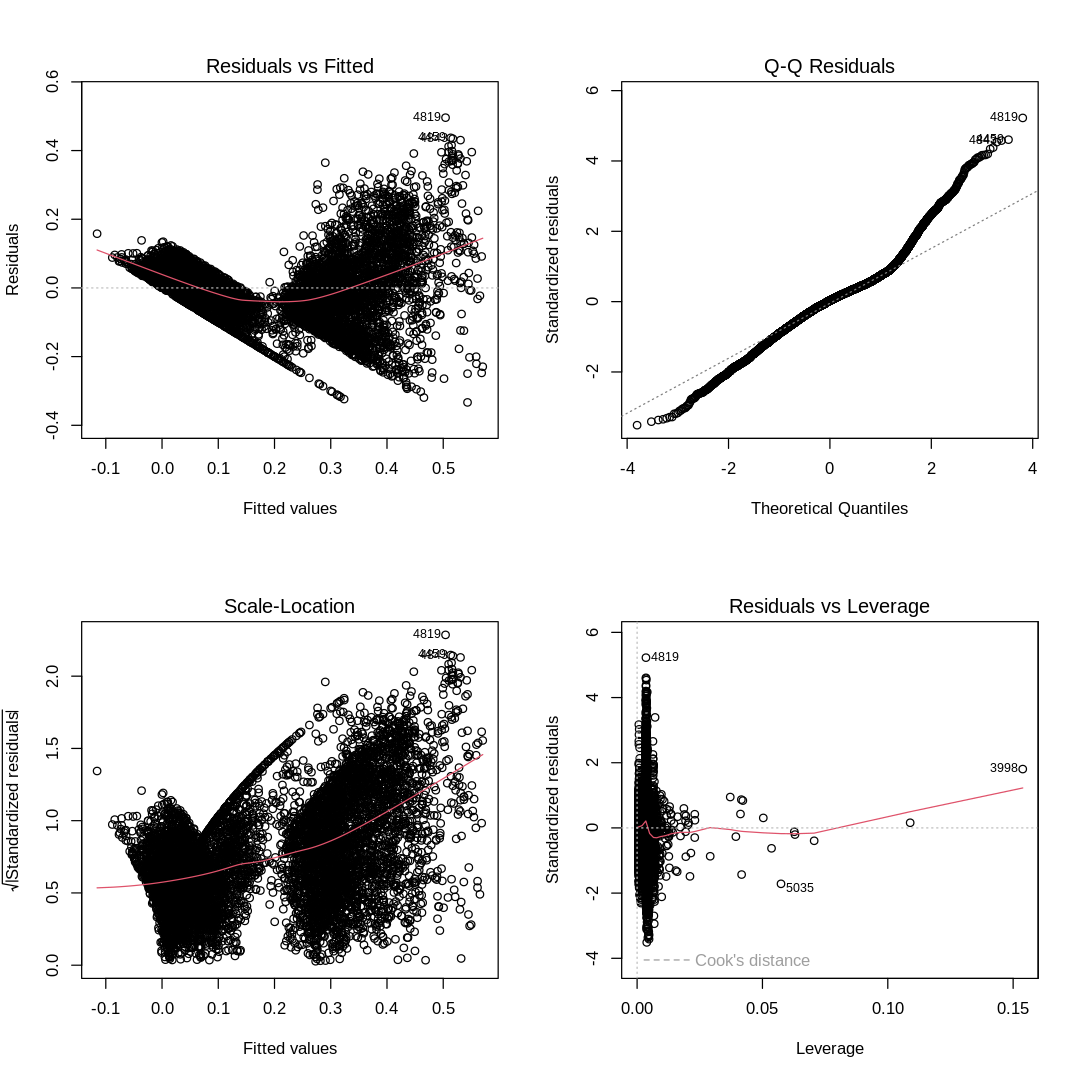

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(full_bike_model)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


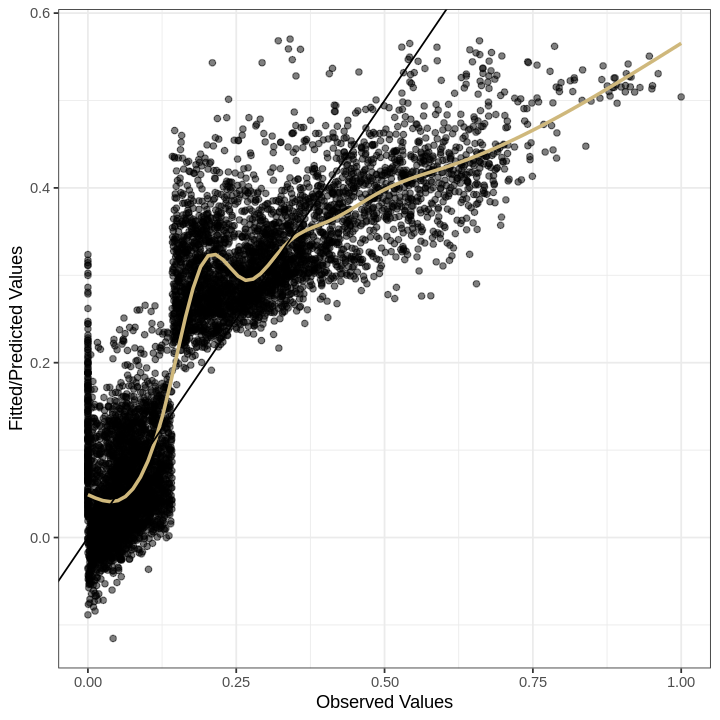

In [ ]:
# Fitted Vs Observed Values
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(bike_data.model, aes(x = y, y = yhat)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

### **Interpretation**

- From the plot, The yellow trend line shows how the fitted values compare to the observed values.

- However, the trend line in this plot curves significantly, especially at the lower and higher ends of observed values. This suggests that the relationship between the predictors and the target variable is not perfectly linear.

- The residuals (the vertical distances from the data points to the trend line) show a pattern, which is an indication that `linearity` is not fully met.

- There also seems to be an increase in the spread of residuals as the observed values increase, which could be a sign of heteroscedasticity.


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


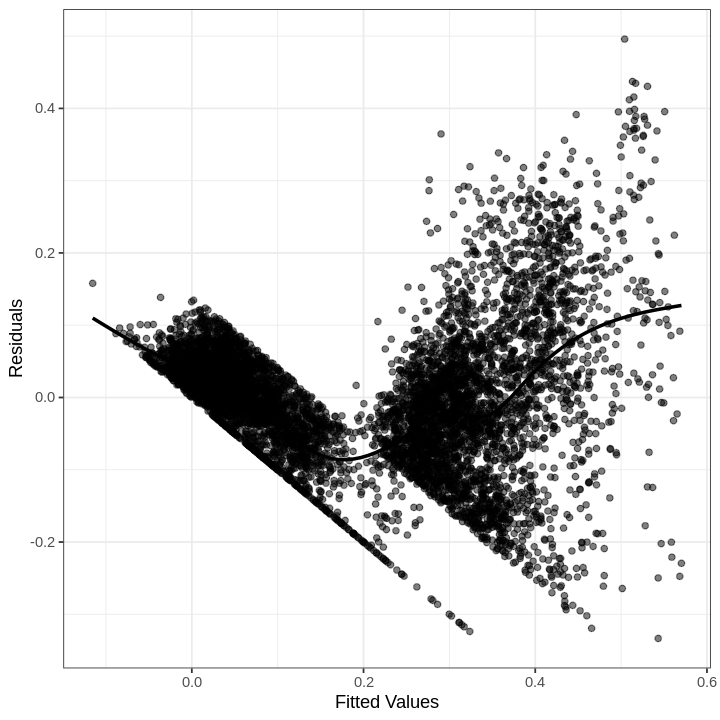

In [ ]:
# Residuals Vs Fitted Plot
ggplot(bike_data.model, aes(x = yhat, y = r)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "black") +
    xlab("Fitted Values") + ylab("Residuals")+
    theme_bw()

### **Interpretation**

- The plot shows a clear pattern as the fitted values increase, the variance of the residuals also increases. This "funnel" shape, where the residuals are more spread out for larger values of the fitted variable, is a classic sign of `heteroscedasticity`.

- It suggests that the model's predictive accuracy varies across different levels of the independent variables, and the assumption of equal variance in the residuals is `violated`.

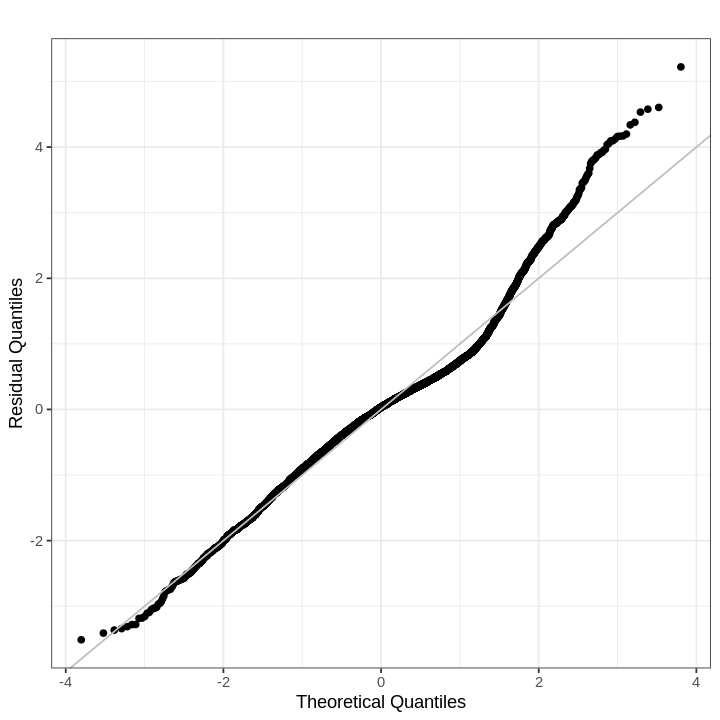

In [ ]:
# Q-Q Plot
ggplot(bike_data.model, aes(sample = (r - mean(r))/sd(r))) +
    stat_qq() + geom_abline(slope = 1, intercept = 0, col = "grey") +
    xlab("Theoretical Quantiles") +
    ylab("Residual Quantiles") +
    ggtitle("") +
    theme_bw()

### **Interpretation**

- In the center of the plot, the points closely follow the reference line, which indicates that the middle portion of the data conforms well to `normality`.

- However, towards the ends, particularly in the upper tail, there is a clear deviation from the line. The points curve upwards, away from the reference line.

- This pattern indicates that the residuals have heavier tails than a normal distribution would predict. In other words, there are more extreme values in the dataset (both high and low) than what would be expected if the residuals were perfectly normal.

- The observed deviation from normality could be due to outliers, the influence of non-linear relationships not captured by the model, or other factors such as heteroscedasticity.

# **Technique 9 : Model Selection – AIC, BIC, MSPE, R^2, Ra^2**

In [ ]:
n = dim(bike_data_e)[1];

reg_model <- regsubsets(RentedBikeCount ~.-FunctioningDay-DayOfWeek-Weekday-Date, data = train,nvmax = 35)
reg_summary <- summary(reg_model)

reg_summary$which

reg_summary$rsq

(Intercept) Hour1 Hour2 Hour3 Hour4 Hour5 Hour6 Hour7 Hour8 Hour9 ⋯ Humidity
1  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
2  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
3  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
4  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
5  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
6  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
7  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
8  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE ⋯ FALSE   
9  TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE ⋯  TRUE   
10 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE ⋯  TRUE   
11 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE ⋯  TRUE   
12 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
13 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
14 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
15 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
16 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
17 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
18 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
19 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE ⋯  TRUE   
20 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
21 TRUE        FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
22 TRUE        FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
23 TRUE        FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
24 TRUE        FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
25 TRUE        FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
26 TRUE        FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
27 TRUE        FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
28 TRUE         TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
29 TRUE         TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
30 TRUE         TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
31 TRUE         TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
32 TRUE         TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
33 TRUE         TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
34 TRUE         TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE ⋯  TRUE   
35 TRUE         TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE ⋯  TRUE   
   WindSpeed Visibility DewPointTemperature SolarRadiation Rainfall Snowfall
1  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
2  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
3  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
4  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
5  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
6  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
7  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
8  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
9  FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
10 FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
11 FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
12 FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
13 FALSE     FALSE      FALSE               FALSE          FALSE    FALSE   
14 FALSE     FALSE      FALSE               F

[1] 0.5994821 0.6314542 0.6466482 0.6595868 0.6691833 0.6794852 0.6884391
 [8] 0.6973559 0.7073417 0.7147775 0.7193314 0.7215028 0.7236918 0.7244429
[15] 0.7251442 0.7257930 0.7263377 0.7267556 0.7271672 0.7274277 0.7275830
[22] 0.7277605 0.7278849 0.7279262 0.7279577 0.7279858 0.7280184 0.7280477
[29] 0.7280656 0.7280794 0.7280992 0.7281085 0.7281163 0.7281233 0.7281293

- The table above shows the most suitable model of size $k$.

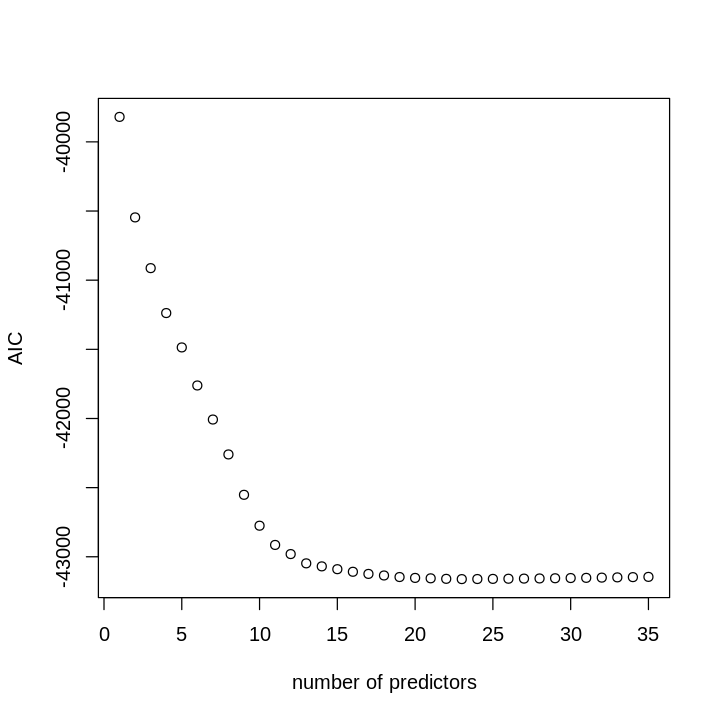

In [ ]:
AIC = 2*(2:36) + n*log(reg_summary$rss/n)
plot(AIC ~ I(1:35), xlab = "number of predictors", ylab = "AIC")

- The plot depicts the `Akaike Information Criterion (AIC)` values for models with varying numbers of predictors.

- From the plot, it seems that the model configuration with the lowest AIC value includes approximately `30 predictors`. The point on the graph is situated at the bottom of the curve, signifying an optimal balance between model complexity (number of predictors) and goodness of fit.


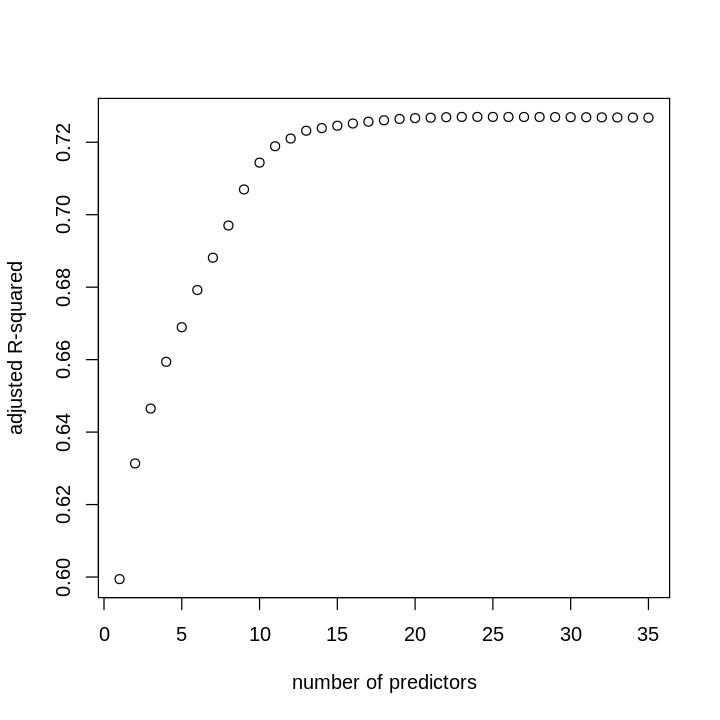

In [ ]:
plot(1:35, reg_summary$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

- The model with `35 predictors` exhibits the most best fit to the data compared to the other examined models, achieving the highest adjusted R-squared value, which is around 0.72. The score indicates almost 72% of the variation in the data, taking into account the number of predictors used.

- This shows that it may provide the best balance between model complexity.

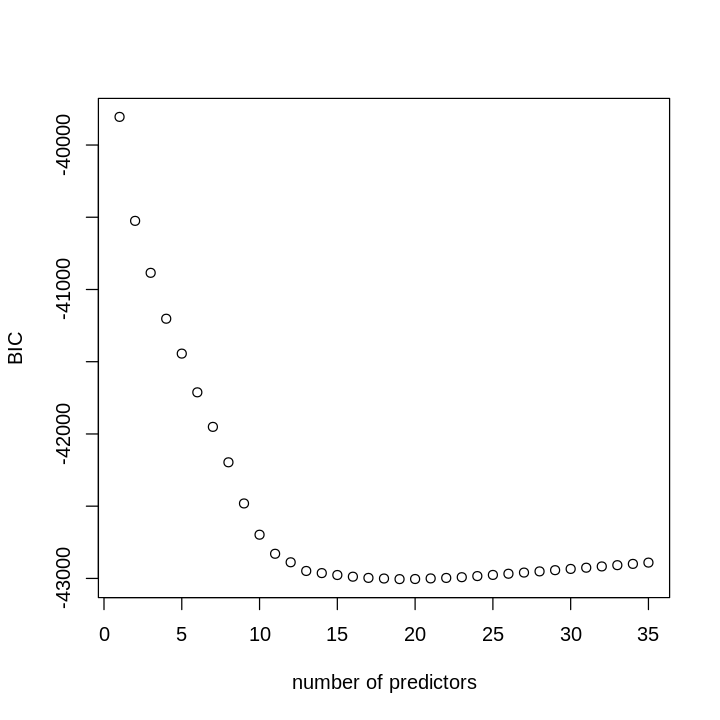

In [ ]:
BIC = log(n)*(2:36) + n*log(reg_summary$rss/n)
plot(BIC ~ I(1:35), xlab = "number of predictors", ylab = "BIC")

- The model with approximately 30 predictors has the highest BIC value. It achieves the bare minimum point on the curve, indicating that it offers the optimum balance between model complexity and fit based on the BIC criterion.

- And BIC, which is given as

$$BIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = (p+1)\log(n) -2\log L\left(\widehat{\boldsymbol\beta} \right),$$

chooses the same model as AIC.

### **Computing MSPE's for Best Models**

In [ ]:
compute_MSPEs <- function(train, test, reg_summary) {
  mspe_values <- numeric(35)  # Adjust the size if necessary
  for (i in 1:35) {

    model_vars <- names(which(reg_summary$which[i, ]))
    # Rename the specific feature in the list of model variables
    model_vars <- gsub("Rental_CategoryLow Rentals", "Rental_Category", model_vars)
    model_vars <- gsub("Rainfall_CategoryRain", "Rainfall_Category", model_vars)

    model_formula <- as.formula(paste("RentedBikeCount ~", paste(model_vars[-1], collapse = "+")))
    print(model_formula)

    model_fit <- lm(model_formula, data = train)

    predictions <- predict(model_fit, newdata = test)

    mspe_values[i] <- mean((test$RentedBikeCount - predictions)^2)
  }
  return(mspe_values)
}

# Run the function with your training and testing datasets
mspes <- compute_MSPEs(train, test, reg_summary)

print(mspes)

# Finding the best model size based on MSPE
best_model_size <- which.min(mspes)
cat(sprintf("The best model according to MSPE is %d with an MSPE of %.4f.\n", best_model_size, mspes[best_model_size]))


RentedBikeCount ~ Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour18 + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour18 + Temperature + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour18 + Hour19 + Temperature + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour18 + Hour19 + Hour20 + Temperature + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour17 + Hour18 + Hour19 + Hour20 + Temperature + 
    Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour17 + Hour18 + Hour19 + Hour20 + Hour21 + 
    Temperature + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour17 + Hour18 + Hour19 + Hour20 + Hour21 + 
    Temperature + Rental_Category + Rainfall_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour8 + Hour17 + Hour18 + Hour19 + Hour20 + 
    Hour21 + Temperature + Humidity + Rental_Category
<environment: 0x59a07995f920>
RentedBikeCount ~ Hour8 + Hour17 

### **Interpretation**

- The `Model 30` is considered the best modelfor p redicting bike rentals since it has the lowest Mean Squared Prediction Error (MSPE) of 0.00889, which indicates a high level of accuracy .

- This model successfully achieves a balance between complexity and generalizability, indicating that it includes the most relevant variables without overfitting.

# **Project Report**

## **1. Introduction/Background**

I am fascinated by the idea of forecasting bike rental demand as it has the potential to significantly improve the efficiency of urban transportation. By making precise forecasts about bike usage, I can help in ensuring that bike-sharing systems efficiently respond to user demands, thereby avoiding both bike shortages and excesses. This research also has wider advantages, such as promoting environmental sustainability and improving public health by encouraging more riding.

This study examines the variables that influence the demand for bike rentals in Seoul's bike-sharing system. Bike-sharing enables individuals to lease bikes for a limited duration, thereby promoting convenient transportation across the city. The study examines the impact of variables such as weather, time, and holidays on the rental volume of bikes. Getting insight into these connections enables optimising of bike-sharing operations, hence improving their dependability and effectiveness for urban residents.

Prior research has investigated the influence of environmental components, such as weather conditions, and urban dynamics, such as the day of the week and holidays, on the use of bike-sharing schemes. These studies demonstrate regular trends in how users behave and moves in demand, highlighting the necessity for advanced prediction models. My research builds upon these findings by including a wide variety of variables to provide an in-depth look of the factors that influence demand in Seoul.

The data for this study was gathered from an observational dataset obtained from Seoul's public bike-sharing programme. The purpose of collecting this data was to efficiently monitor and manage the bike-sharing system. The dataset comprises full records of bike rentals on an daily basis, together with a range of environmental and temporal factors. It is likely that the Seoul government or an associated agency collected this data in order to analyse usage patterns and enhance the service.

This study aims to tackle the key questions regarding the impact of various elements, such as weather conditions, holidays, and time, on the demand for bike rentals. Does bike use fluctuate significantly between weekdays and weekends or across different seasons? Through the investigation of these questions, my intention is to reveal valuable knowledge that can inform the strategic development of bike-sharing services, helping them to more effectively respond to the demands of their users.



## **2. Methods/Results(experimental design and data collection)**

The data is taken from a publicly available dataset given by the Seoul Metropolitan Government. This dataset is a component of an effort aimed at improving data-driven decision-making and is open to the public for research purposes. The dataset includes detailed daily records of bike rentals, including weather conditions and other relevant features. I conducted exploratory data analysis by initially addressing missing values and duplicates also checked for outliers in the dataset using is.na() and duplicated(). I have also renamed the column names for easy access. Following that, I performed a thorough analysis of the data distribution by employing histograms, box plots, and scatter plots in order to gain insights into the connections among variables like seasons, temperature and temporal factors. The initial examination helped me in recognising trends, patterns, and possible abnormalities in the data.

To tackle the research questions, I used a range of statistical tests and modelling methodologies. The techniques that were used included `T-tests` for mean comparison, `ANOVA` for examining differences among different groups, `Regression Modeling` for understanding variable correlations.

**Analyses used:**

- I used a `T-test` to see how the average number of bike rentals changed during the weekday versus the weekend. To check this, I used `Welch's adjustment for unequal variances` when necessary. The results showed that there was no significant change, which means that rentals are essentially the same on these days.

- I used a `hypothesis test with randomization` to figure out what effect holidays had. I found `bootstrapped confidence intervals` for days with and without snow. It gave accurate predictions even when the data isn't distributed normally. The fact that the confidence intervals for these conditions did not meet showed that rentals dropped significantly when it snowed.

- I used a `Welch Two Sample T-test`, which works for data with different variances, to look at the effect of rain. This test I checked to see if there is a big difference between the means of two separate samples, given that the samples are separate. The clear difference in means showed that rain makes people less likely to ride bikes.

- I used the `F-test` to see if the amount of rain changes the variation in bike rentals. The results showed big differences, which suggests that rental trends are less stable when it rains a lot.

- To compare bike rentals between seasons, I used `ANOVA`. I assumed that the groups were normally distributed and had similar variances, which I checked with `Shapiro-Wilk` and `Levene's tests`. I looked into how bike rentals change with the seasons. The important results showed that rental patterns change with the seasons, with big drops in rentals when the weather is bad.

- I used `linear regression` to model how different factors affected each other, thinking that the I got errors were independent, the residuals were normal, and the model was linear. The R-squared and Adjusted R-squared model showed that the linear regression model explains about 72.81% of the variation in bike rentals.

- I used `diagnostic plots` to check these assumptions. I used `AIC`, `BIC`, and `adjusted R^2` to find the best predictive model. These measures find a good mix between model complexity and goodness of fit. The idea behind this is that models with fewer variables and less complexity are better if they can show the relationships in the data well.







## **Relevant Plots**

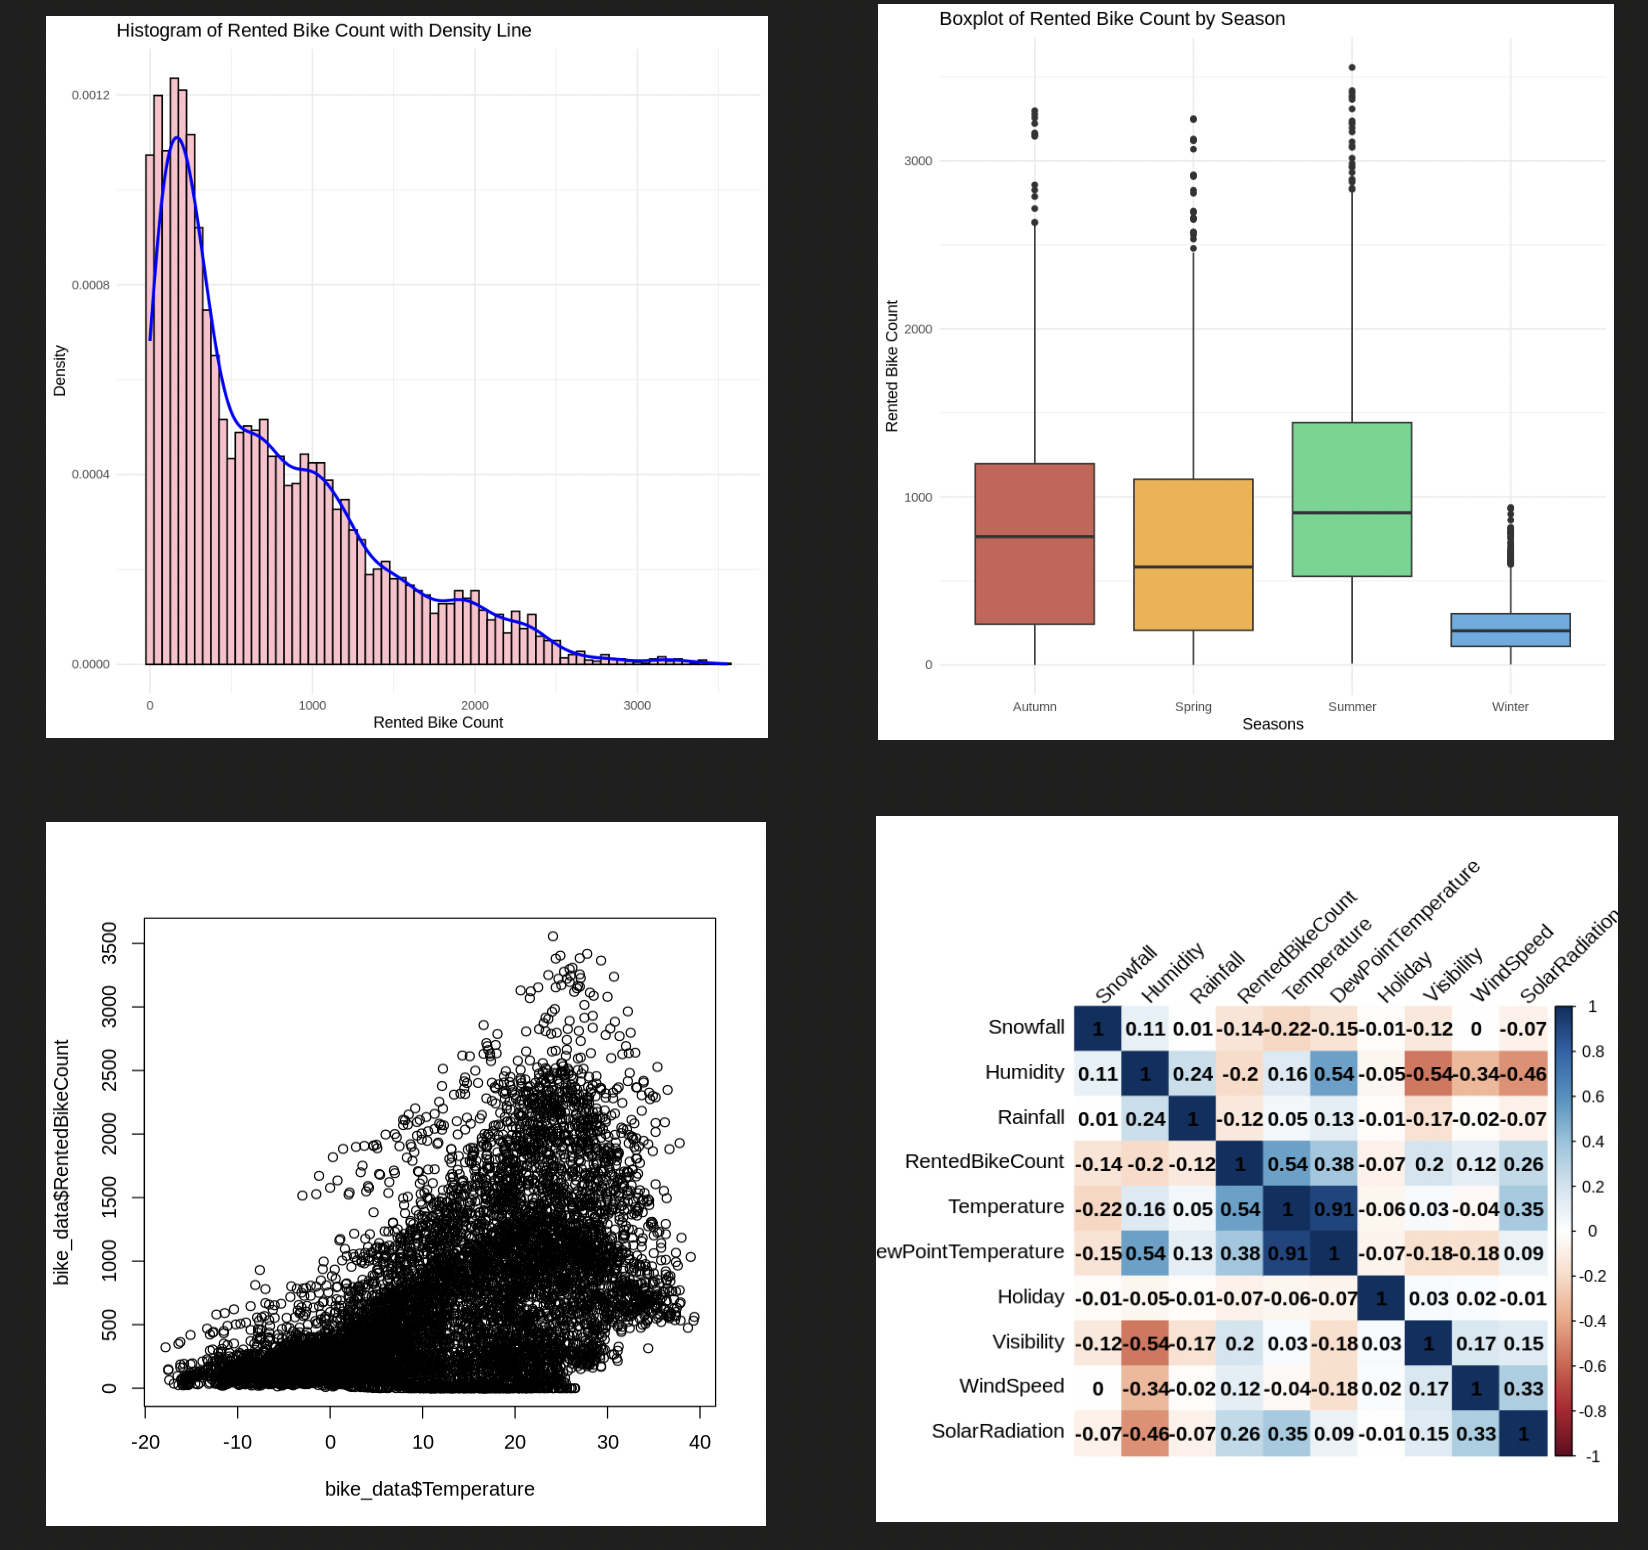


I used histogram plot to compare and contrast bike rental counts across various categories like temperature, seasons and hour and to check the normlaity. The rental counts are skewed to the right in the histogram plot, which means that smaller rental counts happen more often. Here, the scatter plots to explains the connections between continuous variables. There isn't a straight line between bike rentals and temperature, in the scatter plot. Rentals go up as temperature goes up until a certain point, and I also used scatter plot between the Fitted Vs Observed values to check the linearity and Fitted Vs residuals to check homoscedasticity and a Q - Q plot(line plot) to check normality. The best model through AIC, BIC and R^2 square for identifying the lowest, highest predictors for best fit. Correlations were also visualized by using matrix.  Here, I also used Each graph was accompanied by a recording that explained the information they provided regarding bike rental behaviours. The seasonal boxplot shows that rates are higher in the summer and much lower in the winter, which suggests that seasons have a big effect. The correlation matrix does a good job of showing how different factors are related to each other. For example, it confirms that warmer temperatures usually lead to higher rents.

The statistical methods I used directly answered the study questions by giving the solid answers based on data-driven insights. As expected, the T-tests and randomization tests showed that rental prices were not significantly different between weekdays and weekends. However, they were significantly lower on holidays, which fits with our questions about timing effects. The bootstrapped confidence intervals and T-tests for weather conditions showed that prices dropped significantly when it rained or snowed, which supported our investigation into the effects on the environment. ANOVA showed how bike rentals change with the seasons, and regression models figured out how different factors affect rental behaviour by showing which conditions have the most impact. Each method was carefully picked to find out the nuances of how different factors affect bike-sharing use. This proved the validity of the study approach and gave the useful information.

## **3. Conclusions**

The in-depth study proved that changes in time, weather, and seasons have a big effect on bike rentals trends in Seoul. Rental rates stayed the same during the week and on the weekends, but they dropped a lot on holidays and days when it rained or snowed. A clear rise in rentals was seen during warmer seasons, showing how strongly changes in the seasons affect bike use. These results show how useful it is to use a range of statistical methods to look into and understand the complex factors that affect bike-sharing systems in cities.

I learned how important it is to use a variety of statistical tools to get correct data on how people move around in cities. This study showed again how important time and place are in affecting bike-sharing use, giving clear evidence to help make operational choices. The regression models were also useful because they showed which factors have a big effect on how often people rent bikes. This gave planners and managers of bike-sharing systems useful information for making decisions.

Future research could build on this by adding real-time data analytics to dynamically predict and react to changes in demand for bike-sharing. Adding demographic and behavioural information about users could help us understand demand trends better, which would allow us to make more targeted marketing and business plans.

I want to look into how changes to urban infrastructure, like adding more bike lanes, affect how people rent things. It might also be interesting to look at how different towns with different climates and urban layouts compare to each other. Using more statistical models could also make it easier to predict changes in demand, which could lead to bike-sharing systems that are stronger and better able to handle the problems of city life.




